In [381]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import time
from datetime import datetime
from datetime import date

plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 18

In [382]:
line_items = pd.read_csv('line-items.csv')

In [383]:
products = pd.read_csv('products.csv')

In [384]:
sales = pd.read_csv('sales.csv', parse_dates=['sale_date'])

In [385]:
customers = pd.read_csv('customers.csv')

# Line Items

In [386]:
line_items.shape

(170537, 30)

In [387]:
line_items.columns

Index([u'id', u'cost', u'cost_total', u'discount', u'discount_total',
       u'is_return', u'loyalty_value', u'note', u'price', u'price_set',
       u'price_total', u'product_id', u'quantity', u'sale_id', u'sequence',
       u'status', u'tax', u'tax_components', u'tax_id', u'tax_total',
       u'total_cost', u'total_discount', u'total_loyalty_value',
       u'total_price', u'total_tax', u'unit_cost', u'unit_discount',
       u'unit_loyalty_value', u'unit_price', u'unit_tax'],
      dtype='object')

In [388]:
# Rename columns
line_items.rename(columns={'id': 'line_id', 'total_price': 'line_total_price'}, inplace=True)


In [389]:
line_items

,line_id,cost,cost_total,discount,discount_total,is_return,loyalty_value,note,price,price_set,...,total_cost,total_discount,total_loyalty_value,line_total_price,total_tax,unit_cost,unit_discount,unit_loyalty_value,unit_price,unit_tax
0,1db540cf-678c-99ae-11e4-857d9586c159,12.00,120.00,-7.00,-70.00,False,0.0,NaN,7.00,True,...,120.00,-70.00,0.0,70.00,7.000,12.00,-7.00,0.0,7.00,0.700
1,1db540cf-678c-99ae-11e4-857ddff06d15,13.00,13.00,0.00,0.00,False,0.0,NaN,17.50,False,...,13.00,0.00,0.0,17.50,1.750,13.00,0.00,0.0,17.50,1.750
2,1db540cf-678c-b704-11e4-7e8af19692df,12.00,12.00,0.00,0.00,False,0.0,NaN,12.50,False,...,12.00,0.00,0.0,12.50,1.250,12.00,0.00,0.0,12.50,1.250
3,1db540cf-678c-b704-11e4-7e8aff8d2e8b,12.00,12.00,-5.00,-5.00,False,0.0,NaN,5.00,True,...,12.00,-5.00,0.0,5.00,0.500,12.00,-5.00,0.0,5.00,0.500
4,1db540cf-678c-b704-11e4-7e8b058d8c28,12.00,12.00,-7.00,-7.00,False,0.0,NaN,7.00,True,...,12.00,-7.00,0.0,7.00,0.700,12.00,-7.00,0.0,7.00,0.700
5,1db540cf-678c-9625-11e4-7e932d923cfc,12.00,12.00,-7.00,-7.00,False,0.0,NaN,7.00,True,...,12.00,-7.00,0.0,7.00,0.700,12.00,-7.00,0.0,7.00,0.700
6,1db540cf-678c-9625-11e4-7e9334397790,2.00,2.00,0.00,0.00,False,0.0,NaN,4.50,False,...,2.00,0.00,0.0,4.50,0.450,2.00,0.00,0.0,4.50,0.450
7,1db540cf-678c-a6fa-11e4-7e89e9238946,4.95,4.95,0.00,0.00,False,0.0,NaN,6.80,False,...,4.95,0.00,0.0,6.80,0.680,4.95,0.00,0.0,6.80,0.680
8,1db540cf-678c-a8ad-11e4-7f7124cebf77,5.61,5.61,0.00,0.00,False,0.0,NaN,8.50,False,...,5.61,0.00,0.0,8.50,0.850,5.61,0.00,0.0,8.50,0.850
9,070c5c1b-8587-9ce0-11e4-8d6b45e98526,7.00,140.00,0.00,0.00,False,0.0,NaN,9.00,False,...,140.00,0.00,0.0,180.00,18.000,7.00,0.00,0.0,9.00,0.900


In [390]:
line_items.isnull().sum().sort_values(ascending=False)

note                   158857
unit_tax                    0
unit_price                  0
cost                        0
cost_total                  0
discount                    0
discount_total              0
is_return                   0
loyalty_value               0
price                       0
price_set                   0
price_total                 0
product_id                  0
quantity                    0
sale_id                     0
sequence                    0
status                      0
tax                         0
tax_components              0
tax_id                      0
tax_total                   0
total_cost                  0
total_discount              0
total_loyalty_value         0
line_total_price            0
total_tax                   0
unit_cost                   0
unit_discount               0
unit_loyalty_value          0
line_id                     0
dtype: int64

In [391]:
line_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170537 entries, 0 to 170536
Data columns (total 30 columns):
line_id                170537 non-null object
cost                   170537 non-null float64
cost_total             170537 non-null float64
discount               170537 non-null float64
discount_total         170537 non-null float64
is_return              170537 non-null bool
loyalty_value          170537 non-null float64
note                   11680 non-null object
price                  170537 non-null float64
price_set              170537 non-null bool
price_total            170537 non-null float64
product_id             170537 non-null object
quantity               170537 non-null float64
sale_id                170537 non-null object
sequence               170537 non-null int64
status                 170537 non-null object
tax                    170537 non-null float64
tax_components         170537 non-null object
tax_id                 170537 non-null object
tax_total   

In [392]:
#New line items dataframe with needed columns
line_items2 = line_items[['line_id', 'sale_id','product_id', 'quantity', 'cost', 'total_cost', 'line_total_price', 
                          'discount', 'total_discount', 'status', 'unit_price', 'sequence', 'loyalty_value',
                          'total_loyalty_value', 'unit_tax', 'total_tax']]
line_items2

,line_id,sale_id,product_id,quantity,cost,total_cost,line_total_price,discount,total_discount,status,unit_price,sequence,loyalty_value,total_loyalty_value,unit_tax,total_tax
0,1db540cf-678c-99ae-11e4-857d9586c159,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-7e84725b9b4f,10.0,12.00,120.00,70.00,-7.00,-70.00,CONFIRMED,7.00,0,0.0,0.0,0.700,7.000
1,1db540cf-678c-99ae-11e4-857ddff06d15,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,1.0,13.00,13.00,17.50,0.00,0.00,CONFIRMED,17.50,1,0.0,0.0,1.750,1.750
2,1db540cf-678c-b704-11e4-7e8af19692df,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e84a197f158,1.0,12.00,12.00,12.50,0.00,0.00,VOIDED,12.50,0,0.0,0.0,1.250,1.250
3,1db540cf-678c-b704-11e4-7e8aff8d2e8b,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e847233a41c,1.0,12.00,12.00,5.00,-5.00,-5.00,VOIDED,5.00,1,0.0,0.0,0.500,0.500
4,1db540cf-678c-b704-11e4-7e8b058d8c28,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e84725b9b4f,1.0,12.00,12.00,7.00,-7.00,-7.00,VOIDED,7.00,2,0.0,0.0,0.700,0.700
5,1db540cf-678c-9625-11e4-7e932d923cfc,1db540cf-678c-b704-11e4-7e8b2b47851b,b8ca3a65-01b5-11e4-fbb5-7e847246ae1d,1.0,12.00,12.00,7.00,-7.00,-7.00,VOIDED,7.00,0,0.0,0.0,0.700,0.700
6,1db540cf-678c-9625-11e4-7e9334397790,1db540cf-678c-b704-11e4-7e8b2b47851b,b8ca3a65-01b5-11e4-fbb5-7e84844676a6,1.0,2.00,2.00,4.50,0.00,0.00,VOIDED,4.50,1,0.0,0.0,0.450,0.450
7,1db540cf-678c-a6fa-11e4-7e89e9238946,1db540cf-678c-a6fa-11e4-7e89de289a6a,b8ca3a65-01b5-11e4-fbb5-7e848e334e23,1.0,4.95,4.95,6.80,0.00,0.00,VOIDED,6.80,0,0.0,0.0,0.680,0.680
8,1db540cf-678c-a8ad-11e4-7f7124cebf77,1db540cf-678c-a754-11e4-7f709b3dff2c,b8ca3a65-01b5-11e4-fbb5-7e849885f83f,1.0,5.61,5.61,8.50,0.00,0.00,VOIDED,8.50,0,0.0,0.0,0.850,0.850
9,070c5c1b-8587-9ce0-11e4-8d6b45e98526,070c5c1b-8587-9ce0-11e4-8d62a8d78e3e,b8ca3a65-01b5-11e4-fbb5-7e849989d924,20.0,7.00,140.00,180.00,0.00,0.00,VOIDED,9.00,0,0.0,0.0,0.900,18.000


# Products

In [393]:
products.shape

(971, 54)

In [394]:
products.columns

Index([u'id', u'account_code', u'account_code_purchase', u'active',
       u'attributes', u'brand', u'brand.deleted_at', u'brand.id',
       u'brand.name', u'brand.version', u'brand_id', u'button_order',
       u'categories', u'created_at', u'deleted_at', u'description', u'handle',
       u'has_inventory', u'has_variants', u'image_thumbnail_url', u'image_url',
       u'images', u'is_active', u'is_composite', u'loyalty_amount', u'name',
       u'price_excluding_tax', u'price_including_tax', u'product_type_id',
       u'sku', u'source', u'source_id', u'source_variant_id', u'supplier',
       u'supplier.deleted_at', u'supplier.description', u'supplier.id',
       u'supplier.name', u'supplier.source', u'supplier.version',
       u'supplier_code', u'supplier_id', u'supply_price', u'tag_ids', u'type',
       u'type.deleted_at', u'type.id', u'type.name', u'type.version',
       u'updated_at', u'variant_name', u'variant_options',
       u'variant_parent_id', u'version'],
      dtype='object')

In [395]:
# Rename id to product_id
products.rename(columns={'id': 'product_id', 'name': 'product_name'}, inplace=True)

In [396]:
products.head()

,product_id,account_code,account_code_purchase,active,attributes,brand,brand.deleted_at,brand.id,brand.name,brand.version,...,type,type.deleted_at,type.id,type.name,type.version,updated_at,variant_name,variant_options,variant_parent_id,version
0,b8ca3a65-011c-11e4-fbb5-7e7d90a601c6,NaN,NaN,False,[],NaN,NaN,b8ca3a65-011c-11e4-fbb5-7e7d90aa9d2c,Generic Brand,1010224.0,...,NaN,NaN,NaN,NaN,NaN,2014-12-08T02:40:43+00:00,Coffee (Demo),[],NaN,50794218
1,b8ca3a65-011c-11e4-fbb5-7e7d90a3d13c,NaN,NaN,False,[],NaN,NaN,b8ca3a65-011c-11e4-fbb5-7e7d90aa9d2c,Generic Brand,1010224.0,...,NaN,NaN,NaN,NaN,NaN,2014-12-08T02:40:44+00:00,T-shirt (Demo),[],NaN,50794229
2,b8ca3a65-01b5-11e4-fbb5-7e84942322fe,NaN,NaN,False,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b8ca3a65-01b5-11e4-fbb5-7e8489872c25,CARNATION,571015.0,2015-03-06T22:47:23+00:00,SIM CARNATION,[],NaN,67929089
3,b8ca3a65-01b5-11e4-fbb5-7e846ad3f4fa,NaN,NaN,True,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b8ca3a65-01b5-11e4-fbb5-7e846ae3bddb,ACCESSORIES1,570998.0,2015-03-06T22:46:38+00:00,ACCESSORIES,[],NaN,78835452
4,b8ca3a65-01b5-11e4-fbb5-7e8496ea55e0,NaN,NaN,True,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b8ca3a65-01b5-11e4-fbb5-7e846dd5f9dc,GREENERY,571004.0,2015-03-06T22:46:39+00:00,ACUBA,[],NaN,78835456


In [397]:
# Drop rows from products
remove_products = ['Coffee (Demo)', 'T-shirt (Demo)','Account payments', 'No Sale', 'Test Product', 'Discount' ]

products.drop(products.index[products[products['product_name'].isin(remove_products)].index], inplace=True)
products.reset_index(inplace=True)

In [398]:
products.drop(products.index[products[products['product_name'].str.startswith('DELIVERY')].index], inplace=True)
products.reset_index(inplace=True)

In [399]:
products[products['product_name'].str.startswith('DELIVERY')].index

Int64Index([], dtype='int64')

In [400]:
products.isnull().sum().sort_values(ascending=False)

type.deleted_at          955
supplier.deleted_at      955
source_variant_id        955
source_id                955
brand                    955
brand.deleted_at         955
account_code_purchase    955
type                     955
supplier                 955
loyalty_amount           955
account_code             955
brand.id                 954
brand.name               954
brand.version            954
brand_id                 954
supplier.source          951
supplier.description     949
deleted_at               949
supplier.id              945
supplier.name            945
supplier.version         945
supplier_id              945
variant_parent_id        696
type.name                253
supplier_code            144
description               46
type.version              32
type.id                   32
product_type_id           32
active                     0
attributes                 0
product_id                 0
index                      0
button_order               0
categories    

In [401]:
products2 = products[['product_id', 'product_name', 'supply_price', 'price_including_tax']]
products2

,product_id,product_name,supply_price,price_including_tax
0,b8ca3a65-01b5-11e4-fbb5-7e84942322fe,SIM CARNATION,3.70,8.50
1,b8ca3a65-01b5-11e4-fbb5-7e846ad3f4fa,ACCESSORIES,1.00,0.00
2,b8ca3a65-01b5-11e4-fbb5-7e8496ea55e0,ACUBA,5.50,8.50
3,b8ca3a65-01b5-11e4-fbb5-7e848a6b1d1a,AGAPANTHUS~mini,5.00,6.50
4,b8ca3a65-01b5-11e4-fbb5-7e848fddfc88,ALLIUM,8.00,7.50
5,b8ca3a65-01b5-11e4-fbb5-7e848d7910e1,ALPINIA PINK,4.50,6.50
6,b8ca3a65-01b5-11e4-fbb5-7e8487389b2f,ARABS EYE,4.50,7.50
7,a0369f1f-90b5-11e4-f68e-bd783b98da81,Arrangement,20.00,35.00
8,b8ca3a65-01b5-11e4-fbb5-7e8497e9a85f,ARUM LILY,7.00,10.50
9,b8ca3a65-01b5-11e4-fbb5-7e8492138a48,ARUM~white locals,4.50,7.50


# Sales

In [402]:
sales.shape

(32000, 24)

In [403]:
sales.columns

Index([u'id', u'created_at', u'customer_id', u'deleted_at', u'invoice_number',
       u'line_items', u'note', u'outlet_id', u'payments', u'receipt_number',
       u'register_id', u'return_for', u'sale_date', u'short_code', u'source',
       u'source_id', u'status', u'taxes', u'total_loyalty', u'total_price',
       u'total_tax', u'updated_at', u'user_id', u'version'],
      dtype='object')

In [404]:
# Rename id to sales_id
sales.rename(columns={'id': 'sale_id'}, inplace=True)

In [405]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 24 columns):
sale_id           32000 non-null object
created_at        32000 non-null object
customer_id       32000 non-null object
deleted_at        0 non-null float64
invoice_number    32000 non-null object
line_items        32000 non-null object
note              23665 non-null object
outlet_id         32000 non-null object
payments          32000 non-null object
receipt_number    32000 non-null object
register_id       32000 non-null object
return_for        11 non-null object
sale_date         32000 non-null datetime64[ns]
short_code        32000 non-null object
source            32000 non-null object
source_id         0 non-null float64
status            32000 non-null object
taxes             32000 non-null object
total_loyalty     32000 non-null float64
total_price       32000 non-null float64
total_tax         32000 non-null float64
updated_at        32000 non-null object
user_id  

In [406]:
sales2 = sales[['sale_id','customer_id', 'sale_date','total_price']]
sales2

,sale_id,customer_id,sale_date,total_price
0,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-857dd5e7674d,2014-12-16 23:48:49,87.50
1,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-08 03:34:51,24.50
2,1db540cf-678c-b704-11e4-7e8b2b47851b,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-08 04:33:23,11.50
3,1db540cf-678c-a6fa-11e4-7e89de289a6a,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-08 03:26:00,6.80
4,1db540cf-678c-a754-11e4-7f709b3dff2c,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-09 07:01:22,8.50
5,070c5c1b-8587-9ce0-11e4-8d62a8d78e3e,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-27 01:55:14,180.00
6,1db540cf-678c-a5df-11e4-7e8b63153087,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-29 03:56:28,17.00
7,fdcbfe52-0b81-af30-11e4-8ef5b1c89ce2,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-29 02:34:54,84.30
8,77ec1673-3c20-96c6-11e4-8ef58a155dc0,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-29 00:57:21,7.50
9,fdcbfe52-0b81-af30-11e4-8ef5855a88a0,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-29 00:57:12,17.50


In [407]:
sales2.describe()

,total_price
count,32000.000000
mean,225.680531
std,354.863525
min,-1169.900000
25%,51.000000
50%,121.000000
75%,267.000000
max,13592.000000


In [408]:
np.median(sales2.total_price)

121.0

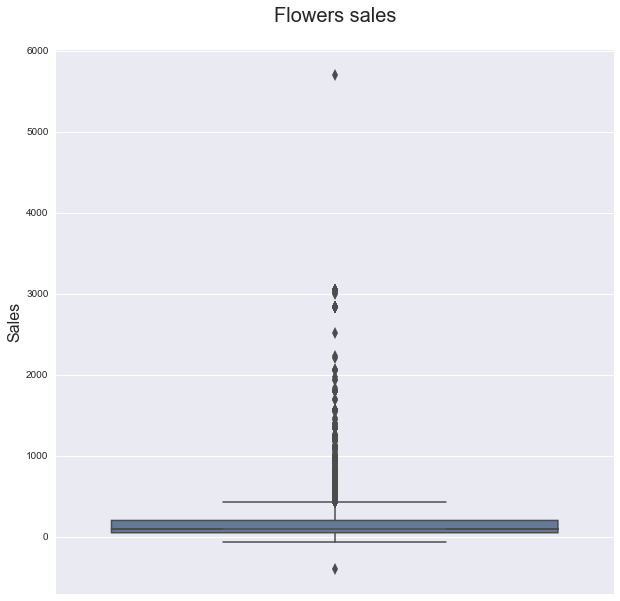

In [409]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

ax = sns.boxplot(sales.total_price[sales.total_price], orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('Sales', fontsize=16)
ax.set_title('Flowers sales\n', fontsize=20)

plt.show()

In [410]:
#Was checking the distribution type on log sales
#sns.distplot(np.log(sales.total_price[sales.total_price > 0]))

In [411]:
sales2.groupby('customer_id').total_price.sum().sort_values(ascending=False)

customer_id
b8ca3a65-01b5-11e4-fbb5-7e8385d4ec73    371537.54
b8ca3a65-01b5-11e4-fbb5-7e8386a4e671    252592.12
b8ca3a65-01b5-11e4-fbb5-7e8386458151    232057.31
b8ca3a65-01b5-11e4-fbb5-7e83893c3741    210391.15
b8ca3a65-01b5-11e4-fbb5-7e83873d86bb    190612.76
064dce89-c7b5-11e5-ec2a-ef108382bc9f    168023.95
b8ca3a65-01b5-11e4-fbb5-7e838620d063    142254.60
b8ca3a65-01b5-11e4-fbb5-7e8387c74715    117276.66
b8ca3a65-01b5-11e4-fbb5-7e838888c69f    115345.65
e52b2846-e9b5-11e4-f98b-f50cfa751896    112267.80
b8ca3a65-01b5-11e4-fbb5-7e83863f575d    112126.42
b8ca3a65-01b5-11e4-fbb5-7e83885418d8    110764.01
b8ca3a65-01b5-11e4-fbb5-7e8389e2fa68    108875.25
b8ca3a65-01b5-11e4-fbb5-7e8385ebd70d    106861.15
b8ca3a65-01b5-11e4-fbb5-7e8385678537    104720.05
b8ca3a65-01b5-11e4-fbb5-7e8387cdffd5     93013.95
b8ca3a65-01b5-11e4-fbb5-7e838837dc9f     92484.25
a0369f1f-90b5-11e4-ee62-b89ca4573ff1     86122.30
b8ca3a65-01b5-11e4-fbb5-7e838a0e0c34     85510.31
b8ca3a65-01b5-11e4-fbb5-7e838571e467  

In [412]:
sales2['sale_date'] = sales['sale_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
sales2['sale_date'] = pd.to_datetime(sales2['sale_date'])

In [413]:
df_sales = sales2.groupby('sale_date',as_index=False).total_price.sum()
df_sales.set_index(df_sales.sale_date, inplace=True)

df_sales.head()

,sale_date,total_price
sale_date,,
2014-12-08,2014-12-08,42.8
2014-12-09,2014-12-09,8.5
2014-12-16,2014-12-16,342.5
2014-12-17,2014-12-17,40.0
2014-12-27,2014-12-27,188.5


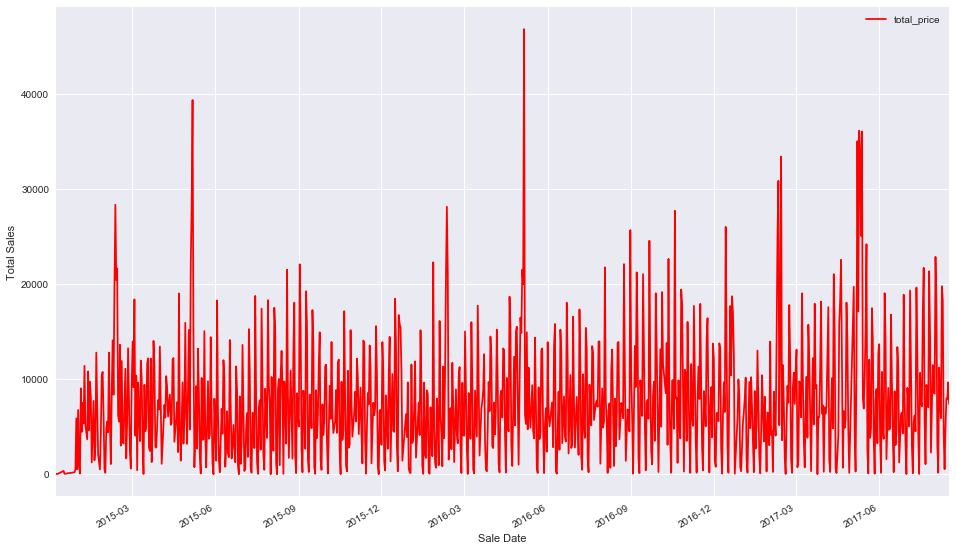

In [414]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 18
ax = df_sales.plot(x='sale_date', y='total_price', c='r')
ax.set_xlabel("Sale Date")
ax.set_ylabel("Total Sales")
ax.set_title('Fresh Flowers sales\n', fontsize=20)

In [415]:
sales2.groupby('sale_date').sum().sort_values('total_price', ascending=False)

,total_price
sale_date,
2016-05-06,46848.17
2015-05-07,39384.31
2017-05-10,36151.50
2017-05-13,36078.70
2017-05-08,35056.54
2017-05-11,33925.00
2017-02-13,33432.37
2017-02-10,30874.88
2015-02-11,28360.20


# Customers

In [416]:
customers.shape

(1718, 43)

In [417]:
customers.columns

Index([u'id', u'balance', u'company_name', u'created_at', u'custom_field_1',
       u'custom_field_2', u'custom_field_3', u'custom_field_4',
       u'customer_code', u'customer_group_id', u'date_of_birth', u'deleted_at',
       u'do_not_email', u'email', u'enable_loyalty', u'fax', u'first_name',
       u'gender', u'last_name', u'loyalty_balance', u'mobile', u'name',
       u'note', u'phone', u'physical_address_1', u'physical_address_2',
       u'physical_city', u'physical_country_id', u'physical_postcode',
       u'physical_state', u'physical_suburb', u'postal_address_1',
       u'postal_address_2', u'postal_city', u'postal_country_id',
       u'postal_postcode', u'postal_state', u'postal_suburb', u'twitter',
       u'updated_at', u'version', u'website', u'year_to_date'],
      dtype='object')

In [418]:
# Rename id to customer_id and name to customer_name
customers.rename(columns={'id': 'customer_id', 'company_name': 'customer_name','name': 'full_name'}, inplace=True)

In [419]:
customers.isnull().sum().sort_values(ascending=False)

date_of_birth          1718
twitter                1718
website                1717
custom_field_3         1716
custom_field_4         1716
deleted_at             1705
gender                 1699
custom_field_2         1645
postal_suburb          1596
postal_address_2       1526
note                   1503
physical_address_2     1459
custom_field_1         1422
physical_country_id    1407
physical_suburb        1401
physical_postcode      1395
postal_country_id      1353
physical_address_1     1333
physical_city          1292
physical_state         1211
postal_postcode        1074
last_name              1028
postal_city             989
postal_address_1        948
postal_state            947
fax                     516
first_name              502
email                   500
full_name               460
phone                   287
mobile                  262
customer_name           113
balance                   0
created_at                0
year_to_date              0
customer_code       

In [420]:
customers2 = customers[['customer_id', 'customer_name','full_name','customer_code']]

In [421]:
#Populating company_name where null.
customers2.customer_name.fillna(value=customers2.full_name, inplace=True)

In [422]:
customers2.customer_name.fillna(value=customers2.customer_code, inplace=True)

In [423]:
customers2[customers2.customer_name.isnull()]

,customer_id,customer_name,full_name,customer_code


In [424]:
customers2.head()

,customer_id,customer_name,full_name,customer_code
0,b8ca3a65-01b5-11e4-fbb5-7e83851ae68e,Adore Event Floral Dsgn**- COD,Charmaine Allen,10004
1,b8ca3a65-01b5-11e4-fbb5-7e838539f77a,APACK PTY LTD,Karen,10010
2,b8ca3a65-01b5-11e4-fbb5-7e8385459c91,ASPLEY FLORIST**- COD,SHARON,10012
3,b8ca3a65-01b5-11e4-fbb5-7e83854ac3d2,Aug-21,,10013
4,b8ca3a65-01b5-11e4-fbb5-7e83858ab7ef,BITS BASKETS 'N' BALLOONS,Susanna Vickery,10023


# Merge line_items and products

In [425]:
line_products = line_items2.merge(products2, left_on='product_id', right_on='product_id')
line_products

,line_id,sale_id,product_id,quantity,cost,total_cost,line_total_price,discount,total_discount,status,unit_price,sequence,loyalty_value,total_loyalty_value,unit_tax,total_tax,product_name,supply_price,price_including_tax
0,1db540cf-678c-99ae-11e4-857d9586c159,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-7e84725b9b4f,10.0,12.00,120.00,70.00,-7.00,-70.00,CONFIRMED,7.00,0,0.0,0.0,0.700,7.000,CYMBIDIUM ORCHID~green,12.00,0.0
1,1db540cf-678c-b704-11e4-7e8b058d8c28,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e84725b9b4f,1.0,12.00,12.00,7.00,-7.00,-7.00,VOIDED,7.00,2,0.0,0.0,0.700,0.700,CYMBIDIUM ORCHID~green,12.00,0.0
2,1db540cf-678c-99ae-11e4-857ddff06d15,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,1.0,13.00,13.00,17.50,0.00,0.00,CONFIRMED,17.50,1,0.0,0.0,1.750,1.750,PAEONIE ROSE~hot pink,17.50,25.0
3,3fff073c-4302-a778-11e5-21de062159d4,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,2.0,17.50,35.00,33.00,8.50,17.00,CONFIRMED,16.50,0,0.0,0.0,1.650,3.300,PAEONIE ROSE~hot pink,17.50,25.0
4,6fc9c827-e9e5-9521-11e5-80ddfecaf14a,6fc9c827-e9e5-9521-11e5-80dc6870ce5a,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,5.0,17.50,87.50,87.50,7.50,37.50,CONFIRMED,17.50,0,0.0,0.0,1.750,8.750,PAEONIE ROSE~hot pink,17.50,25.0
5,f597f212-56ea-89ba-11e5-81068d0646d0,f597f212-56ea-89ba-11e5-8103b0a972cc,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,2.0,17.50,35.00,35.00,7.50,15.00,CONFIRMED,17.50,0,0.0,0.0,1.750,3.500,PAEONIE ROSE~hot pink,17.50,25.0
6,978697f6-5cd4-a9d1-11e5-865a0846018e,978697f6-5cd4-a9d1-11e5-8659872c5dfa,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,1.0,17.50,17.50,19.50,5.50,5.50,CONFIRMED,19.50,0,0.0,0.0,1.950,1.950,PAEONIE ROSE~hot pink,17.50,25.0
7,d593ce71-9c90-9d23-11e5-864e9043c78a,d593ce71-9c90-9d23-11e5-86473d6b11a0,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,3.0,17.50,52.50,43.50,10.50,31.50,CONFIRMED,14.50,0,0.0,0.0,1.450,4.350,PAEONIE ROSE~hot pink,17.50,25.0
8,c1c4c424-50c2-98f3-11e5-873c6e115602,c1c4c424-50c2-98f3-11e5-87265f9f9608,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,12.0,17.50,210.00,210.00,7.50,90.00,CONFIRMED,17.50,0,0.0,0.0,1.750,21.000,PAEONIE ROSE~hot pink,17.50,25.0
9,e3d58bb8-4c10-9e67-11e5-8e4a3fbadd86,e3d58bb8-4c10-9e67-11e5-8e42703c7620,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,1.0,17.50,17.50,14.50,10.50,10.50,CONFIRMED,14.50,0,0.0,0.0,1.450,1.450,PAEONIE ROSE~hot pink,17.50,25.0


# Merge sales and customers

In [426]:
customer_sales = sales2.merge(customers2, left_on='customer_id', right_on='customer_id')
customer_sales

,sale_id,customer_id,sale_date,total_price,customer_name,full_name,customer_code
0,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-857dd5e7674d,2014-12-16,87.5,Joe stevenson,Joe stevenson,Joe-DKP2
1,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-08,24.5,Pascal Sherman,Pascal Sherman,10228
2,1db540cf-678c-b704-11e4-7e8b2b47851b,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-08,11.5,Pascal Sherman,Pascal Sherman,10228
3,1db540cf-678c-a6fa-11e4-7e89de289a6a,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-08,6.8,Pascal Sherman,Pascal Sherman,10228
4,1db540cf-678c-a754-11e4-7f709b3dff2c,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-09,8.5,Pascal Sherman,Pascal Sherman,10228
5,070c5c1b-8587-9ce0-11e4-8d62a8d78e3e,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-27,180.0,Pascal Sherman,Pascal Sherman,10228
6,1db540cf-678c-a5df-11e4-7e8b63153087,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-29,17.0,Pascal Sherman,Pascal Sherman,10228
7,fdcbfe52-0b81-af30-11e4-8ef5b1c89ce2,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-29,84.3,Pascal Sherman,Pascal Sherman,10228
8,77ec1673-3c20-96c6-11e4-8ef58a155dc0,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-29,7.5,Pascal Sherman,Pascal Sherman,10228
9,fdcbfe52-0b81-af30-11e4-8ef5855a88a0,b8ca3a65-01b5-11e4-fbb5-7e8385071525,2014-12-29,17.5,Pascal Sherman,Pascal Sherman,10228


# Merge All

In [427]:

df_flowers = line_products.merge(customer_sales[['sale_id', 'sale_date', 'customer_id', 'customer_name']], left_on='sale_id', right_on='sale_id' )
df_flowers

,line_id,sale_id,product_id,quantity,cost,total_cost,line_total_price,discount,total_discount,status,...,loyalty_value,total_loyalty_value,unit_tax,total_tax,product_name,supply_price,price_including_tax,sale_date,customer_id,customer_name
0,1db540cf-678c-99ae-11e4-857d9586c159,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-7e84725b9b4f,10.0,12.00,120.00,70.00,-7.00,-70.00,CONFIRMED,...,0.0,0.0,0.700,7.000,CYMBIDIUM ORCHID~green,12.00,0.00,2014-12-16,b8ca3a65-01b5-11e4-fbb5-857dd5e7674d,Joe stevenson
1,1db540cf-678c-99ae-11e4-857ddff06d15,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,1.0,13.00,13.00,17.50,0.00,0.00,CONFIRMED,...,0.0,0.0,1.750,1.750,PAEONIE ROSE~hot pink,17.50,25.00,2014-12-16,b8ca3a65-01b5-11e4-fbb5-857dd5e7674d,Joe stevenson
2,1db540cf-678c-b704-11e4-7e8b058d8c28,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e84725b9b4f,1.0,12.00,12.00,7.00,-7.00,-7.00,VOIDED,...,0.0,0.0,0.700,0.700,CYMBIDIUM ORCHID~green,12.00,0.00,2014-12-08,b8ca3a65-01b5-11e4-fbb5-7e8385071525,Pascal Sherman
3,1db540cf-678c-b704-11e4-7e8af19692df,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e84a197f158,1.0,12.00,12.00,12.50,0.00,0.00,VOIDED,...,0.0,0.0,1.250,1.250,CYMBIDIUM ORCHID,10.00,20.00,2014-12-08,b8ca3a65-01b5-11e4-fbb5-7e8385071525,Pascal Sherman
4,1db540cf-678c-b704-11e4-7e8aff8d2e8b,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e847233a41c,1.0,12.00,12.00,5.00,-5.00,-5.00,VOIDED,...,0.0,0.0,0.500,0.500,CYMBIDIUM ORCHID~burg/maroon,12.00,0.00,2014-12-08,b8ca3a65-01b5-11e4-fbb5-7e8385071525,Pascal Sherman
5,3fff073c-4302-a778-11e5-21de062159d4,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,2.0,17.50,35.00,33.00,8.50,17.00,CONFIRMED,...,0.0,0.0,1.650,3.300,PAEONIE ROSE~hot pink,17.50,25.00,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller
6,3fff073c-4302-a778-11e5-21de6df3d366,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e84a38059a5,3.0,8.00,24.00,40.50,0.00,0.00,CONFIRMED,...,0.0,0.0,1.350,4.050,Spray rose~local,8.00,13.95,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller
7,e178d513-c4f5-a849-11e5-21df80520e64,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e84a38059a5,3.0,8.00,24.00,40.50,0.00,0.00,CONFIRMED,...,0.0,0.0,1.350,4.050,Spray rose~local,8.00,13.95,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller
8,d79b4f66-cd32-8ba9-11e5-21e0246bb4e6,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e848e937ace,1.0,3.80,3.80,7.50,0.00,0.00,CONFIRMED,...,0.0,0.0,0.750,0.750,SPRAY CARNATION,5.50,8.50,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller
9,3fff073c-4302-a778-11e5-21de4f5e51ec,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e849c2a9fe0,2.0,5.85,11.70,17.70,2.15,4.30,CONFIRMED,...,0.0,0.0,0.885,1.770,LISIANTHUS,6.50,10.50,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller


In [428]:
col_join = {}
old_name = {}
for col in df_flowers.product_name.unique():
    newname = col.replace('~', '-')
    newname = newname.split('-')[0]
    newname = newname.strip()
    newname = newname.upper()
    old_name[col] = newname
    if newname in col_join:
        col_join[newname].append(col)        
    else:
        col_join[newname] = [col]
#print col_join

In [429]:
s_name = []
for name in df_flowers.product_name:
    simplified_name = old_name[name]
    s_name.append(simplified_name) 
df_flowers['agg_product_name'] = s_name
    

In [430]:
df_flowers

,line_id,sale_id,product_id,quantity,cost,total_cost,line_total_price,discount,total_discount,status,...,total_loyalty_value,unit_tax,total_tax,product_name,supply_price,price_including_tax,sale_date,customer_id,customer_name,agg_product_name
0,1db540cf-678c-99ae-11e4-857d9586c159,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-7e84725b9b4f,10.0,12.00,120.00,70.00,-7.00,-70.00,CONFIRMED,...,0.0,0.700,7.000,CYMBIDIUM ORCHID~green,12.00,0.00,2014-12-16,b8ca3a65-01b5-11e4-fbb5-857dd5e7674d,Joe stevenson,CYMBIDIUM ORCHID
1,1db540cf-678c-99ae-11e4-857ddff06d15,1db540cf-678c-a980-11e4-7e93aca07db9,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,1.0,13.00,13.00,17.50,0.00,0.00,CONFIRMED,...,0.0,1.750,1.750,PAEONIE ROSE~hot pink,17.50,25.00,2014-12-16,b8ca3a65-01b5-11e4-fbb5-857dd5e7674d,Joe stevenson,PAEONIE ROSE
2,1db540cf-678c-b704-11e4-7e8b058d8c28,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e84725b9b4f,1.0,12.00,12.00,7.00,-7.00,-7.00,VOIDED,...,0.0,0.700,0.700,CYMBIDIUM ORCHID~green,12.00,0.00,2014-12-08,b8ca3a65-01b5-11e4-fbb5-7e8385071525,Pascal Sherman,CYMBIDIUM ORCHID
3,1db540cf-678c-b704-11e4-7e8af19692df,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e84a197f158,1.0,12.00,12.00,12.50,0.00,0.00,VOIDED,...,0.0,1.250,1.250,CYMBIDIUM ORCHID,10.00,20.00,2014-12-08,b8ca3a65-01b5-11e4-fbb5-7e8385071525,Pascal Sherman,CYMBIDIUM ORCHID
4,1db540cf-678c-b704-11e4-7e8aff8d2e8b,1db540cf-678c-a6fa-11e4-7e89f79008af,b8ca3a65-01b5-11e4-fbb5-7e847233a41c,1.0,12.00,12.00,5.00,-5.00,-5.00,VOIDED,...,0.0,0.500,0.500,CYMBIDIUM ORCHID~burg/maroon,12.00,0.00,2014-12-08,b8ca3a65-01b5-11e4-fbb5-7e8385071525,Pascal Sherman,CYMBIDIUM ORCHID
5,3fff073c-4302-a778-11e5-21de062159d4,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e84a4f2689a,2.0,17.50,35.00,33.00,8.50,17.00,CONFIRMED,...,0.0,1.650,3.300,PAEONIE ROSE~hot pink,17.50,25.00,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller,PAEONIE ROSE
6,3fff073c-4302-a778-11e5-21de6df3d366,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e84a38059a5,3.0,8.00,24.00,40.50,0.00,0.00,CONFIRMED,...,0.0,1.350,4.050,Spray rose~local,8.00,13.95,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller,SPRAY ROSE
7,e178d513-c4f5-a849-11e5-21df80520e64,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e84a38059a5,3.0,8.00,24.00,40.50,0.00,0.00,CONFIRMED,...,0.0,1.350,4.050,Spray rose~local,8.00,13.95,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller,SPRAY ROSE
8,d79b4f66-cd32-8ba9-11e5-21e0246bb4e6,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e848e937ace,1.0,3.80,3.80,7.50,0.00,0.00,CONFIRMED,...,0.0,0.750,0.750,SPRAY CARNATION,5.50,8.50,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller,SPRAY CARNATION
9,3fff073c-4302-a778-11e5-21de4f5e51ec,3fff073c-4302-a778-11e5-21ba8c18e990,b8ca3a65-01b5-11e4-fbb5-7e849c2a9fe0,2.0,5.85,11.70,17.70,2.15,4.30,CONFIRMED,...,0.0,0.885,1.770,LISIANTHUS,6.50,10.50,2015-07-04,e52b2846-e9b5-11e5-f98b-21ddd3d550bb,The Flower Miller,LISIANTHUS


# Customer Lifetime Value - Analysis

### Using python lifetimes library and summary_data_from_transaction_data utility function to get the summary data of  frequency, recency, age and monetary value)

Age (T) : Time between first purchase and the end of the observation period.

RECENCY (R) : Time between first and last purchase

FREQUENCY (F) : Number of repeat purchases

MONETARY VALUE (M) : Total money spent



In [431]:
#from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data


In [432]:
summary = summary_data_from_transaction_data(customer_sales, 'customer_id', 'sale_date', 'total_price', freq='W')
summary.sort_values(['frequency', 'monetary_value'], ascending=False)

,frequency,recency,T,monetary_value
customer_id,,,,
b8ca3a65-01b5-11e4-fbb5-7e8385d4ec73,137.0,137.0,137.0,2708.292263
b8ca3a65-01b5-11e4-fbb5-7e8386a4e671,137.0,137.0,137.0,1829.929343
b8ca3a65-01b5-11e4-fbb5-7e838620d063,137.0,137.0,137.0,1032.362044
b8ca3a65-01b5-11e4-fbb5-7e83882f178c,137.0,137.0,137.0,564.006934
b8ca3a65-01b5-11e4-fbb5-7e8389d73d07,137.0,137.0,137.0,418.580657
b8ca3a65-01b5-11e4-fbb5-7e8389476ecc,137.0,137.0,137.0,209.542190
b8ca3a65-01b5-11e4-fbb5-7e8385678537,136.0,136.0,137.0,769.476838
b8ca3a65-01b5-11e4-fbb5-7e8386458151,135.0,137.0,137.0,1707.340815
b8ca3a65-01b5-11e4-fbb5-7e8387c74715,135.0,137.0,137.0,867.071556


In [433]:
#Set index on customers for the merge below
cust = customers2
cust.set_index(['customer_id'], inplace=True)
cust.head()

,customer_name,full_name,customer_code
customer_id,,,
b8ca3a65-01b5-11e4-fbb5-7e83851ae68e,Adore Event Floral Dsgn**- COD,Charmaine Allen,10004
b8ca3a65-01b5-11e4-fbb5-7e838539f77a,APACK PTY LTD,Karen,10010
b8ca3a65-01b5-11e4-fbb5-7e8385459c91,ASPLEY FLORIST**- COD,SHARON,10012
b8ca3a65-01b5-11e4-fbb5-7e83854ac3d2,Aug-21,,10013
b8ca3a65-01b5-11e4-fbb5-7e83858ab7ef,BITS BASKETS 'N' BALLOONS,Susanna Vickery,10023


In [434]:
# RFM Matrix
summary = summary.merge(cust[['customer_name']], how='left', left_index=True, right_index=True)

In [435]:
summary.sort_values(['frequency', 'monetary_value'], ascending=False).head(10)

,frequency,recency,T,monetary_value,customer_name
customer_id,,,,,
b8ca3a65-01b5-11e4-fbb5-7e8385d4ec73,137.0,137.0,137.0,2708.292263,BRADYS FRUIT
b8ca3a65-01b5-11e4-fbb5-7e8386a4e671,137.0,137.0,137.0,1829.929343,DAISYS OF TOOWONG - COD only
b8ca3a65-01b5-11e4-fbb5-7e838620d063,137.0,137.0,137.0,1032.362044,Byron Bay Supa IGA**-COD
b8ca3a65-01b5-11e4-fbb5-7e83882f178c,137.0,137.0,137.0,564.006934,LAIDLEY SUPA IGA** - COD
b8ca3a65-01b5-11e4-fbb5-7e8389d73d07,137.0,137.0,137.0,418.580657,TUGUN FRUIT MARKET**
b8ca3a65-01b5-11e4-fbb5-7e8389476ecc,137.0,137.0,137.0,209.542190,Simon George & Sons P/L
b8ca3a65-01b5-11e4-fbb5-7e8385678537,136.0,136.0,137.0,769.476838,BELLA'S FRUIT MKT
b8ca3a65-01b5-11e4-fbb5-7e8386458151,135.0,137.0,137.0,1707.340815,CLAYFIELD MARKET FRESH
b8ca3a65-01b5-11e4-fbb5-7e8387c74715,135.0,137.0,137.0,867.071556,Hillview Rose Farm - C.O.D. Only


In [436]:
summary.sort_values(['monetary_value'], ascending=False)

,frequency,recency,T,monetary_value,customer_name
customer_id,,,,,
a0369f1f-90b5-11e4-f68e-be20410b6cf2,5.0,5.0,129.0,7306.778000,Lynch Xero Accounts
b8ca3a65-01b5-11e4-fbb5-7e8385ebd70d,28.0,99.0,137.0,3807.987500,Brisbane City Blooms**
b8ca3a65-01b5-11e4-fbb5-7e83893c3741,63.0,63.0,137.0,3301.161111,ROSALIE FOODSTORE
b8ca3a65-01b5-11e4-fbb5-7e8386e55a2e,6.0,60.0,132.0,3230.683333,FARMERS MARKET SALES
022894d1-fdb5-11e7-f9b3-33a262c45d63,1.0,11.0,14.0,2790.000000,Campbell And Bradley
b8ca3a65-01b5-11e4-fbb5-7e8385d4ec73,137.0,137.0,137.0,2708.292263,BRADYS FRUIT
b8ca3a65-01b5-11e4-fbb5-7e8388fd27c4,7.0,14.0,135.0,2622.614286,PRINCESS CRUISES
064dce89-c7b5-11e5-ec2a-ef108382bc9f,72.0,73.0,73.0,2286.100000,Rosalie Foodstore**- NEW OWNERS
06e08a30-eeb5-11e7-ec24-4a5579ae101b,7.0,7.0,8.0,2157.385714,FLAX FLOWER**


In [437]:
np.max(sales.sale_date), np.min(sales.sale_date)

(Timestamp('2017-08-17 03:56:25'), Timestamp('2014-12-08 03:26:00'))

In [438]:
# Calculate number of weeks between first and last sale date from sales data.

number_of_weeks = (np.max(sales.sale_date) - np.min(sales.sale_date)).days / 7
number_of_weeks

140

count    623.000000
mean      26.560193
std       37.021709
min        1.000000
25%        2.000000
50%        8.000000
75%       32.000000
max      137.000000
Name: frequency, dtype: float64


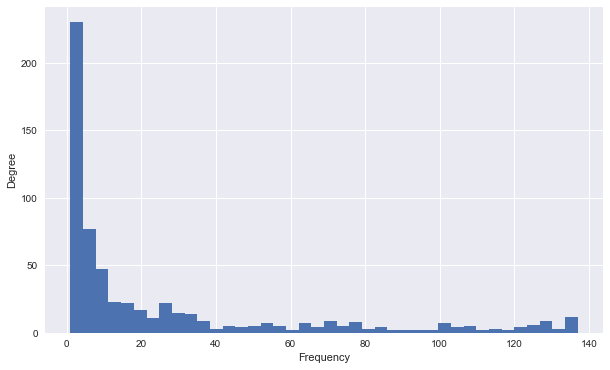

In [439]:
#Plot Frequency
ax = summary[summary['frequency'] > 0]['frequency'].plot(kind='hist', bins=40, figsize=(10,6)) 
ax.set_xlabel("Frequency")
ax.set_ylabel("Degree")

#Descriptive statistics
print summary[summary['frequency'] > 0]['frequency'].describe() 

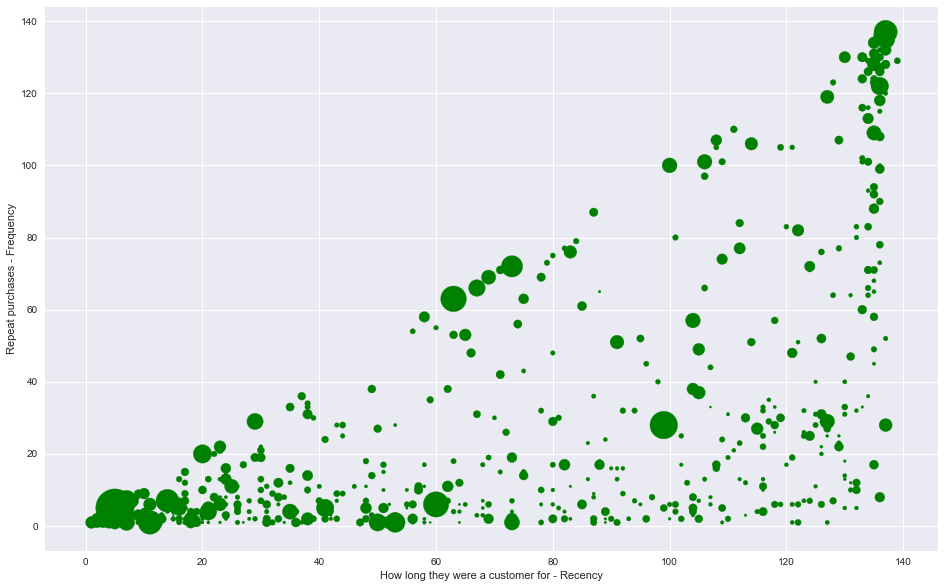

In [444]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 20
plt.scatter(summary.recency, summary.frequency,
                          s=0.2 * summary.monetary_value, c='g')
plt.xlabel("How long they were a customer for - Recency")
plt.ylabel("Repeat purchases - Frequency")

In [264]:
#No repeat purchase - purchased only once
number_of_once_off_customers = (summary.frequency == 0).sum()
number_of_once_off_customers

235

In [265]:
totally_loyal_customers = (summary.recency == summary['T']).sum()
totally_loyal_customers

95

In [266]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
print(bgf)


<lifetimes.BetaGeoFitter: fitted with 858 subjects, a: 0.20, alpha: 1.49, b: 3.98, r: 0.38>


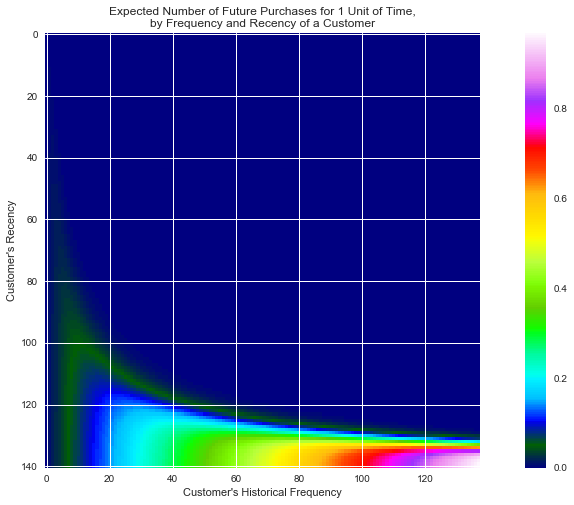

In [267]:
from lifetimes.plotting import plot_frequency_recency_matrix
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 18

plot_frequency_recency_matrix(bgf, cmap='gist_ncar')

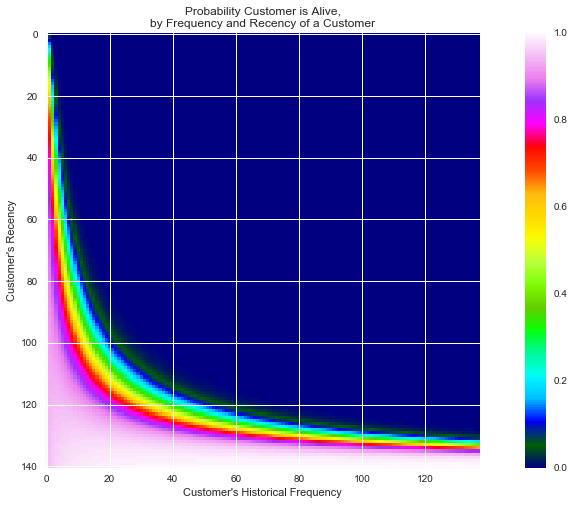

In [268]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf, cmap='gist_ncar')

## Ranking customers

Rank customers from “highest expected purchases in the next period” to lowest. Models expose a method that will predict a customer’s expected purchases in the next period using their history.

In [269]:
t = 52
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
                                 t, summary['frequency'], summary['recency'], summary['T'])

summary.sort_values(['predicted_purchases', 'frequency'], ascending=False)


,frequency,recency,T,monetary_value,customer_name,predicted_purchases
customer_id,,,,,,
b8ca3a65-01b5-11e4-fbb5-7e8385d4ec73,137.0,137.0,137.0,2708.292263,BRADYS FRUIT,4.984377e+01
b8ca3a65-01b5-11e4-fbb5-7e838620d063,137.0,137.0,137.0,1032.362044,Byron Bay Supa IGA**-COD,4.984377e+01
b8ca3a65-01b5-11e4-fbb5-7e8386a4e671,137.0,137.0,137.0,1829.929343,DAISYS OF TOOWONG - COD only,4.984377e+01
b8ca3a65-01b5-11e4-fbb5-7e83882f178c,137.0,137.0,137.0,564.006934,LAIDLEY SUPA IGA** - COD,4.984377e+01
b8ca3a65-01b5-11e4-fbb5-7e8389476ecc,137.0,137.0,137.0,209.542190,Simon George & Sons P/L,4.984377e+01
b8ca3a65-01b5-11e4-fbb5-7e8389d73d07,137.0,137.0,137.0,418.580657,TUGUN FRUIT MARKET**,4.984377e+01
a0369f1f-90b5-11e4-ee62-b89ca4573ff1,130.0,130.0,130.0,658.471538,Chippendalls Newsagency,4.974248e+01
b8ca3a65-01b5-11e4-fbb5-7e8387cdffd5,134.0,135.0,135.0,690.212313,HOLLAND PK FLORIST,4.944751e+01
b8ca3a65-01b5-11e4-fbb5-7e8385678537,136.0,136.0,137.0,769.476838,BELLA'S FRUIT MKT,4.936062e+01


Customer Segment - Activity -- Actionable Tip

Champions	Bought recently - buy often and spend the most!	--- Reward them. Can be early adopters for new products. Will promote your brand.

Loyal Customers	- Spend good money with us often. --- Upsell higher value products. Ask for reviews. Engage them.

Potential Loyalist	Recent customers, but spent a good amount and bought more than once.	Offer membership / loyalty program, recommend other products.

New Customers	Bought most recently, but not often. --- Provide on-boarding support, give them early success, start building relationship.

Promising - Recent shoppers, but haven’t spent much. --- Create brand awareness, offer free trials

Customers Needing Attention	 - Above average recency, frequency and monetary values. May not have bought very recently though. --- Make limited time offers, Recommend based on past purchases. Reactivate them.

About To Sleep - Below average recency, frequency and monetary values. Will lose them if not reactivated. --- Share valuable resources, recommend popular products / renewals at discount, reconnect with them.

At Risk - Spent big money and purchased often. But long time ago. Need to bring them back! --- Send personalized emails to reconnect, offer renewals, provide helpful resources.
Can’t Lose Them - Made biggest purchases, and often. But haven’t returned for a long time. --- Win them back via renewals or newer products, don’t lose them to competition, talk to them.

Hibernating	- Last purchase was long back, low spenders and low number of orders. --- Offer other relevant products and special discounts. Recreate brand value.

Lost - Lowest recency, frequency and monetary scores. --- Revive interest with reach out campaign, ignore otherwise.


In [270]:
#summary['weekly_purchase_probability'] = (1+summary.frequency) / (1+summary['T']) 
#summary.sort_values(['weekly_purchase_probability', 'frequency'], ascending=False)

## Assessing model fit

Check if the model is correct? 

It can be seen in the model below that the actual data and simulated data line up well. 


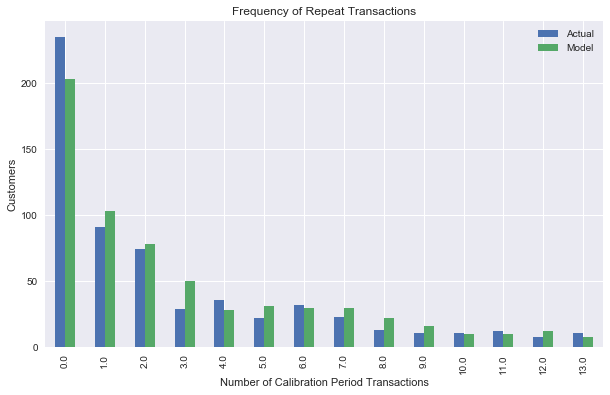

In [271]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 18

from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf, max_frequency=14)

In [272]:
#No repeat purchase - purchased only once
number_of_once_off_customers = (summary.frequency > 14).sum()
number_of_once_off_customers

246

## Calibration period dataset and a holdout dataset model fitting

With transactional data, the partition can be done on the dataset into a calibration period dataset and a holdout dataset. This is important to test how the model performs on data not yet seen (like cross-validation in standard machine learning literature). Lifetimes has a function to partition the dataset like this:

In [273]:
from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(customer_sales, 'customer_id', 'sale_date',
                                        calibration_period_end='2017-01-01',
                                        observation_period_end='2017-08-17' )   
print(summary_cal_holdout.head())

                                      frequency_cal  recency_cal  T_cal  \
customer_id                                                               
0274a24e-fdb5-11e6-f3f1-0cacbb4395f3           18.0        202.0  249.0   
0274a24e-fdb5-11e6-f3f1-0cc649da02e9            0.0          0.0  249.0   
0274a24e-fdb5-11e6-f3f1-0cc79ddebfa7            0.0          0.0  249.0   
0274a24e-fdb5-11e6-f3f1-0d9315afab0a            2.0         14.0   24.0   
0274a24e-fdb5-11e6-f3f1-0e735df5ced4            0.0          0.0  246.0   

                                      frequency_holdout  duration_holdout  
customer_id                                                                
0274a24e-fdb5-11e6-f3f1-0cacbb4395f3               18.0               228  
0274a24e-fdb5-11e6-f3f1-0cc649da02e9                1.0               228  
0274a24e-fdb5-11e6-f3f1-0cc79ddebfa7                1.0               228  
0274a24e-fdb5-11e6-f3f1-0d9315afab0a                0.0               228  
0274a24e-fdb5-11e6

# Plot customer calibration and holdout period.
The plot groups all customers in the calibration period by their number of repeat purchases (x-axis) and then averages over their repeat purchases in the holdout period (y-axis).  The green and blue line presents the model prediction and actual result of the y-axis respectively.

 Actual Purchases in Holdout Period vs Predicted Purchases Plot


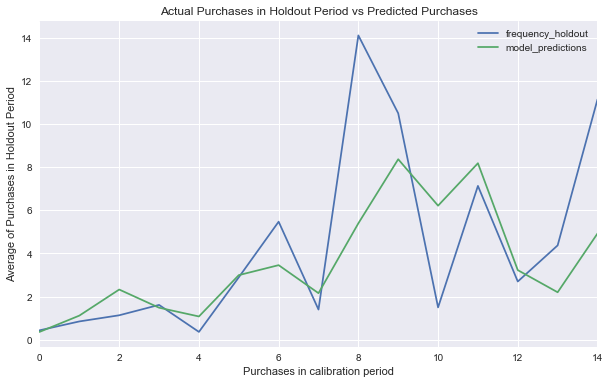

In [274]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout, n=15)

In [275]:
t = 10 #predict purchases in 10 periods
individual = summary.iloc[30]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_to_time`
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])


0.0994624825853474

In [276]:
individual

frequency                                 0
recency                                   0
T                                        26
monetary_value                            0
customer_name          Peng You Restaurant 
predicted_purchases                0.688442
Name: 060f02b1-c8b5-11e6-e913-eff022db06ae, dtype: object

## Customer Probability Histories
Given a customer transaction history, their historical probability of being alive can be calculated according to the trained model. 

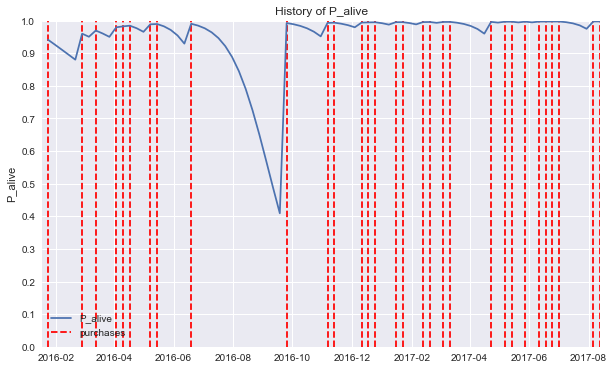

In [277]:
from lifetimes.plotting import plot_history_alive

id = '064dce89-c7b5-11e5-ec2a-be2dfaa3d5cd'
weeks_since_birth = 82
sp_trans = customer_sales.loc[customer_sales['customer_id'] == id]
plot_history_alive(bgf, weeks_since_birth, sp_trans, 'sale_date', freq='W')

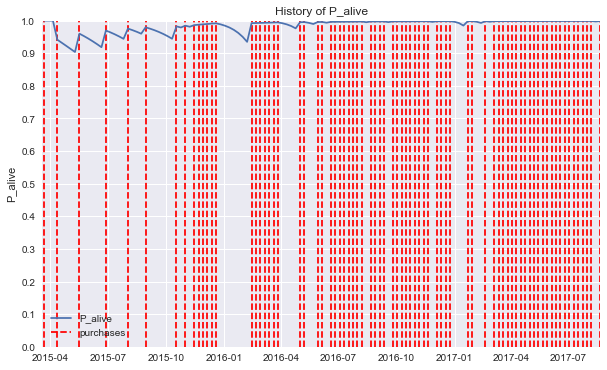

In [278]:
from lifetimes.plotting import plot_history_alive

id = 'a0369f1f-90b5-11e4-f68e-cdf2cb7ce85d'
weeks_since_birth = 82
sp_trans = customer_sales.loc[customer_sales['customer_id'] == id]
plot_history_alive(bgf, weeks_since_birth, sp_trans, 'sale_date', freq='W')

In [279]:
customer_sales[customer_sales.customer_id == '022894d1-fdb5-11e7-f9b3-31e1b9aa2a49']

,sale_id,customer_id,sale_date,total_price,customer_name,full_name,customer_code
31823,ffd49d8b-c961-ab95-11e7-3a959f016a82,022894d1-fdb5-11e7-f9b3-31e1b9aa2a49,2017-05-17,497.5,Cone De Fleur,Maria Thomson,Maria-7V56


In [282]:
risk = summary[(summary.frequency < 50) & (summary.recency < 80)]

In [283]:
risk.sort_values(['monetary_value'], ascending=False).head(100)

,frequency,recency,T,monetary_value,customer_name,predicted_purchases
customer_id,,,,,,
a0369f1f-90b5-11e4-f68e-be20410b6cf2,5.0,5.0,129.0,7306.778000,Lynch Xero Accounts,8.014364e-06
b8ca3a65-01b5-11e4-fbb5-7e8386e55a2e,6.0,60.0,132.0,3230.683333,FARMERS MARKET SALES,5.844271e-01
022894d1-fdb5-11e7-f9b3-33a262c45d63,1.0,11.0,14.0,2790.000000,Campbell And Bradley,3.923807e+00
b8ca3a65-01b5-11e4-fbb5-7e8388fd27c4,7.0,14.0,135.0,2622.614286,PRINCESS CRUISES,1.436212e-05
06e08a30-eeb5-11e7-ec24-4a5579ae101b,7.0,7.0,8.0,2157.385714,FLAX FLOWER**,3.165370e+01
0274a24e-fdb5-11e6-f3f1-0cc79ddebfa7,1.0,53.0,68.0,1968.000000,The Tulip Garden,9.373979e-01
060f02b1-c8b5-11e7-e913-17f8d5bd49e2,20.0,20.0,20.0,1700.570000,Fruit Bros Taigum-COD,4.276910e+01
060f02b1-c8b5-11e6-fcd2-38ce499ea958,5.0,41.0,60.0,1547.180000,Lynch Group Murrarie,3.660241e+00
0274a24e-fdb5-11e6-f3f1-0cc649da02e9,1.0,50.0,68.0,1506.950000,St Paraskevi Church,9.323958e-01


In [284]:
summary.sort_values(['frequency', 'monetary_value'], ascending=False).head(550)

,frequency,recency,T,monetary_value,customer_name,predicted_purchases
customer_id,,,,,,
b8ca3a65-01b5-11e4-fbb5-7e8385d4ec73,137.0,137.0,137.0,2708.292263,BRADYS FRUIT,49.843766
b8ca3a65-01b5-11e4-fbb5-7e8386a4e671,137.0,137.0,137.0,1829.929343,DAISYS OF TOOWONG - COD only,49.843766
b8ca3a65-01b5-11e4-fbb5-7e838620d063,137.0,137.0,137.0,1032.362044,Byron Bay Supa IGA**-COD,49.843766
b8ca3a65-01b5-11e4-fbb5-7e83882f178c,137.0,137.0,137.0,564.006934,LAIDLEY SUPA IGA** - COD,49.843766
b8ca3a65-01b5-11e4-fbb5-7e8389d73d07,137.0,137.0,137.0,418.580657,TUGUN FRUIT MARKET**,49.843766
b8ca3a65-01b5-11e4-fbb5-7e8389476ecc,137.0,137.0,137.0,209.542190,Simon George & Sons P/L,49.843766
b8ca3a65-01b5-11e4-fbb5-7e8385678537,136.0,136.0,137.0,769.476838,BELLA'S FRUIT MKT,49.360625
b8ca3a65-01b5-11e4-fbb5-7e8386458151,135.0,137.0,137.0,1707.340815,CLAYFIELD MARKET FRESH,49.117548
b8ca3a65-01b5-11e4-fbb5-7e8387c74715,135.0,137.0,137.0,867.071556,Hillview Rose Farm - C.O.D. Only,49.117548


## Estimating customer lifetime value using the Gamma-Gamma model

In [285]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ret_cust_summary = summary[(summary['frequency'] > 0) & (summary['monetary_value'] > 0)]

In [286]:
ret_cust_summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.153299
frequency,0.153299,1.000000


In [287]:
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(ret_cust_summary['frequency'],
        ret_cust_summary['monetary_value'])
print(ggf)


<lifetimes.GammaGammaFitter: fitted with 621 subjects, p: 1.37, q: 1.65, v: 172.83>


In [288]:
p,q,v = ggf._unload_params('p', 'q', 'v')
print p, q, v

1.3723139229 1.64547987197 172.825027152


In [374]:
ggf_cond = (ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).sort_values(ascending=False).head(20))


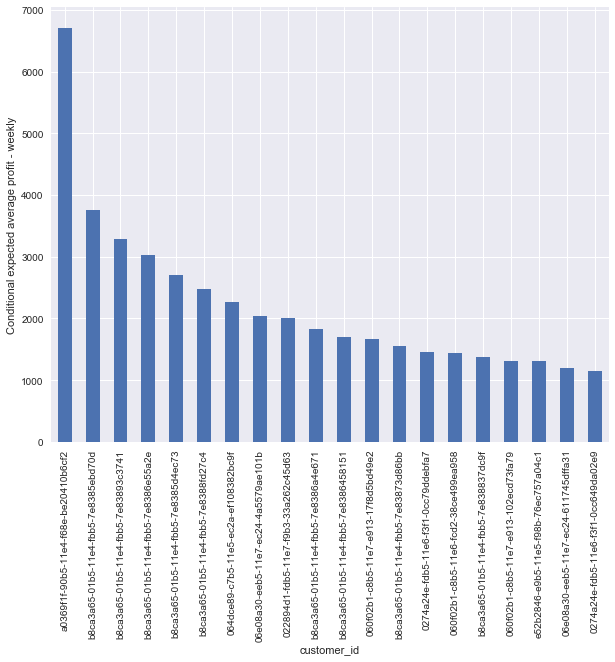

In [377]:
ax = ggf_cond.sort_values(ascending=False).head(20).plot.bar()
#ax.set_xlabel("Frequency")
ax.set_ylabel("Conditional expected average profit - weekly")

In [290]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).mean(),
    summary[summary['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 335.185234568, Average profit: 313.48185224


In [291]:
# refit the BG model to the summary_with_money_value dataset
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

print(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    summary['frequency'],
    summary['recency'],
    summary['T'],
    summary['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).head(10))

customer_id
022894d1-fdb5-11e7-f9b3-31e1b9aa2a49     2526.226629
022894d1-fdb5-11e7-f9b3-3390d08cc968     3241.248689
022894d1-fdb5-11e7-f9b3-33a262c45d63    41691.511521
022894d1-fdb5-11e7-f9b3-351d6790b236     2382.913719
0274a24e-fdb5-11e6-f3f1-0cacbb4395f3    33341.331602
0274a24e-fdb5-11e6-f3f1-0cc649da02e9     6226.802750
0274a24e-fdb5-11e6-f3f1-0cc79ddebfa7     7978.454781
0274a24e-fdb5-11e6-f3f1-0d9315afab0a      703.257329
0274a24e-fdb5-11e6-f3f1-0e735df5ced4      615.347636
0274a24e-fdb5-11e6-f3f1-0e73f81705bf     3195.701164
Name: clv, dtype: float64


In [367]:
# refit the BG model to the summary_with_money_value dataset
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

ggf_cust = (ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    summary['frequency'],
    summary['recency'],
    summary['T'],
    summary['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
))

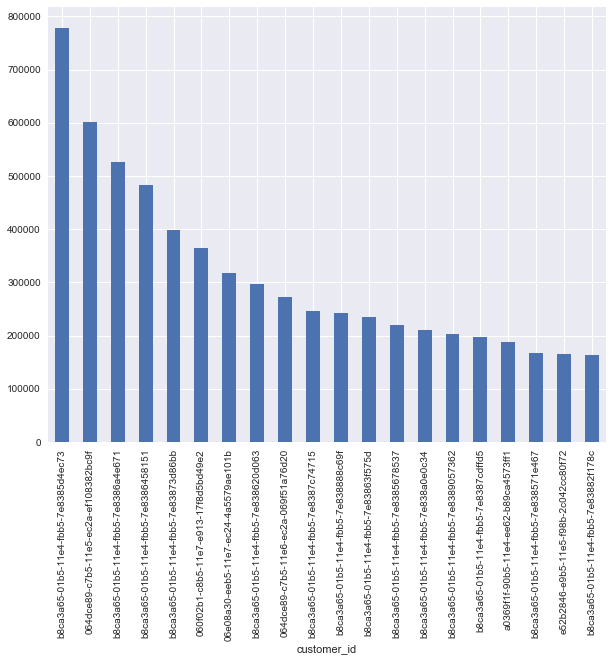

In [371]:
ax = ggf_cust.sort_values(ascending=False).head(20).plot.bar()
#ax.set_xlabel("Frequency")
ax.set_ylabel("Degree")



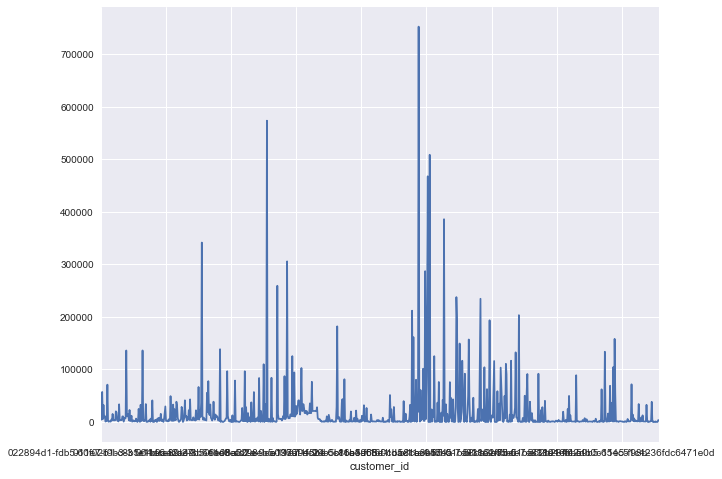

In [365]:
ggf_cust = (ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    summary['frequency'],
    summary['recency'],
    summary['T'],
    summary['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
))
ggf_cust.plot()

In [354]:
summary.sort_values('predicted_purchases').tail(6)

,frequency,recency,T,monetary_value,customer_name,predicted_purchases
customer_id,,,,,,
b8ca3a65-01b5-11e4-fbb5-7e8389476ecc,137.0,137.0,137.0,209.542190,Simon George & Sons P/L,49.843766
b8ca3a65-01b5-11e4-fbb5-7e8386a4e671,137.0,137.0,137.0,1829.929343,DAISYS OF TOOWONG - COD only,49.843766
b8ca3a65-01b5-11e4-fbb5-7e8385d4ec73,137.0,137.0,137.0,2708.292263,BRADYS FRUIT,49.843766
b8ca3a65-01b5-11e4-fbb5-7e83882f178c,137.0,137.0,137.0,564.006934,LAIDLEY SUPA IGA** - COD,49.843766
b8ca3a65-01b5-11e4-fbb5-7e8389d73d07,137.0,137.0,137.0,418.580657,TUGUN FRUIT MARKET**,49.843766
b8ca3a65-01b5-11e4-fbb5-7e838620d063,137.0,137.0,137.0,1032.362044,Byron Bay Supa IGA**-COD,49.843766


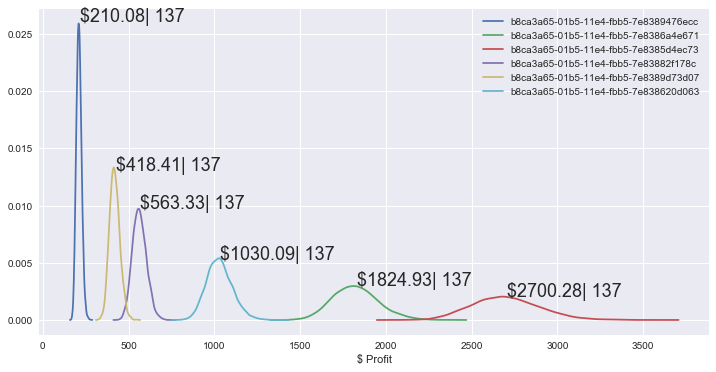

In [293]:
from scipy.stats import beta, gamma, invgamma, norm
best_projected_cust = summary.sort_values('predicted_purchases').tail(6)

customer_scale = p*(v+ret_cust_summary['frequency']*ret_cust_summary['monetary_value'])
customer_shape = p*ret_cust_summary['frequency']+q
ez = customer_scale/(customer_shape-1)
plt.figure(figsize=(12,6))
plt.xlabel('$ Profit')
for ind,i in enumerate(best_projected_cust.index.tolist()):
    ccig = invgamma.rvs(customer_shape[i], scale=customer_scale[i], size = 10000)
    plt.text(ez[i]+5, invgamma.pdf(ez[i], customer_shape[i], scale=customer_scale[i]),
             '$'+str(round(ez[i],2))+'| '+str(int(ret_cust_summary.loc[i,'frequency'])))
    sns.distplot(ccig, hist=False, rug=False, label=str(i));

# Product price analysis

In [294]:
line_products.product_name.value_counts() 


ORIENTAL LILLY                  8208
50cm Rose                       7592
CHRYS GHX                       6008
ASIATIC LILY                    5042
FRESH MIX                       4731
NATIVE POSY                     4133
SINGAPORE ORCHID                4110
LISIANTHUS                      4004
TULIPS                          3820
SIM~Carnation                   3807
SPRAY ROSE                      3723
Gerbera x10                     3512
ALSTRO~Std                      3320
SNAPDRAGON                      3168
GLADIOLI                        2921
SUNFLOWER                       2821
SPRAY CARNATION                 2619
GUM                             2547
IRIS                            2198
GYPSOPHILIA                     2038
PHALAENOPSIS Plants             2007
FREESIA                         2004
CELOSIA                         1897
DISBUD~imported                 1822
WAX FLOWER                      1747
VIBERNUM                        1707
STOCK                           1605
S

In [295]:
#line_products.groupby('product_name').line_total_price.sum().sort_values(ascending=False)

In [296]:
lp = df_flowers.groupby('product_name')['product_name', 'quantity'].sum().sort_values('quantity',ascending=False)
lp

,quantity
product_name,
50cm Rose,104041.3
ORIENTAL LILLY,57699.0
FRESH MIX,38984.0
CHRYS GHX,34896.8
ASIATIC LILY,31390.0
NATIVE POSY,24509.0
TULIPS,19347.5
LISIANTHUS,17746.0
DAFFODIL,17055.0


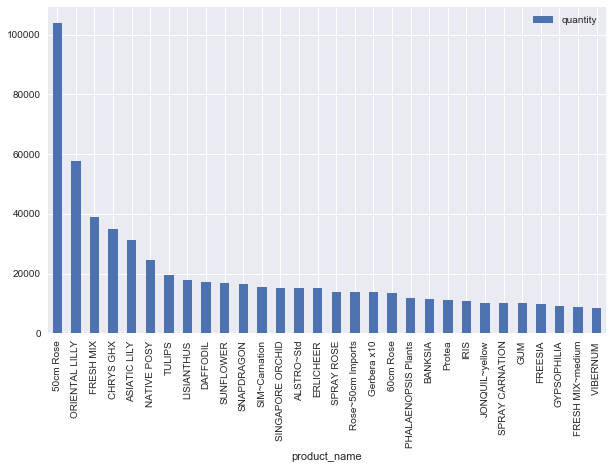

In [297]:
top30 = df_flowers.groupby('product_name')['product_name', 'quantity'
                                          ].sum().sort_values('quantity',ascending=False).head(30)
top30.plot.bar()

In [298]:
rose_50cm = df_flowers[(df_flowers.product_name == '50cm Rose') & (df_flowers.quantity > 0)]

In [299]:
rose_50cm

,line_id,sale_id,product_id,quantity,cost,total_cost,line_total_price,discount,total_discount,status,...,total_loyalty_value,unit_tax,total_tax,product_name,supply_price,price_including_tax,sale_date,customer_id,customer_name,agg_product_name
55,6fc9c827-e9e5-9521-11e5-80df1f914ca2,6fc9c827-e9e5-9521-11e5-80dc6870ce5a,b8ca3a65-01b5-11e4-fbb5-8f10cafb0c42,18.0,7.00,126.00,207.0,3.00,54.0,CONFIRMED,...,0.0,1.150,20.70,50cm Rose,15.0,22.5,2015-11-02,b8ca3a65-01b5-11e4-fbb5-7e83893c3741,ROSALIE FOODSTORE,50CM ROSE
136,07ead7f2-94c0-b645-11e5-93af27b00fa8,07ead7f2-94c0-b645-11e5-93ae9cc33406,b8ca3a65-01b5-11e4-fbb5-8f10cafb0c42,2.0,7.00,14.00,45.0,-8.00,-16.0,CONFIRMED,...,0.0,2.250,4.50,50cm Rose,15.0,22.5,2015-11-25,a0369f1f-90b5-11e4-f68e-cdf2cb7ce85d,Wild At Heart Flowers Chris,50CM ROSE
147,f78d87de-9ed9-923f-11e5-93b89f62c564,f78d87de-9ed9-923f-11e5-93b673eb8da0,b8ca3a65-01b5-11e4-fbb5-8f10cafb0c42,1.0,7.00,7.00,35.0,-20.50,-20.5,CONFIRMED,...,0.0,3.500,3.50,50cm Rose,15.0,22.5,2015-11-25,b8ca3a65-01b5-11e4-fbb5-9c39beb36e39,Main Event Weddings - COD Only,50CM ROSE
163,c5ebdc49-ba21-be41-11e5-93ba349a70c2,c5ebdc49-ba21-be41-11e5-93ba188a532a,b8ca3a65-01b5-11e4-fbb5-8f10cafb0c42,3.0,7.00,21.00,67.5,-8.00,-24.0,CONFIRMED,...,0.0,2.250,6.75,50cm Rose,15.0,22.5,2015-11-25,b8ca3a65-01b5-11e4-fbb5-7e8386a4e671,DAISYS OF TOOWONG - COD only,50CM ROSE
201,51505b1e-eb5b-832a-11e5-9eb0e9c806b6,51505b1e-eb5b-832a-11e5-9eadf9cd1a22,b8ca3a65-01b5-11e4-fbb5-8f10cafb0c42,1.0,7.00,7.00,14.5,0.00,0.0,CONFIRMED,...,0.0,1.450,1.45,50cm Rose,15.0,22.5,2015-12-09,b8ca3a65-01b5-11e4-fbb5-7e83873d86bb,The French Petal Pty Ltd,50CM ROSE
314,c78f63ce-a61d-9779-11e4-e88f15853400,c78f63ce-a61d-9779-11e4-e8879ea443be,b8ca3a65-01b5-11e4-fbb5-8f10cafb0c42,3.0,7.00,21.00,55.5,-4.00,-12.0,CONFIRMED,...,0.0,1.850,5.55,50cm Rose,15.0,22.5,2015-04-22,b8ca3a65-01b5-11e4-fbb5-9c4bc2969826,Poppy Lane Flowers By Design ** Stacey,50CM ROSE
567,c7c6c944-c727-add3-11e5-2f2f9ae89434,c7c6c944-c727-add3-11e5-2f220edd8cf4,b8ca3a65-01b5-11e4-fbb5-8f10cafb0c42,4.0,7.00,28.00,54.0,1.00,4.0,CONFIRMED,...,0.0,1.350,5.40,50cm Rose,15.0,22.5,2015-07-20,b8ca3a65-01b5-11e4-fbb5-7e83882a7d9f,LAIDLEY FLORIST**,50CM ROSE
630,4f3ed30f-8e91-8b10-11e5-566f75df3fbe,4f3ed30f-8e91-8b10-11e5-566dae5d3460,b8ca3a65-01b5-11e4-fbb5-8f10cafb0c42,2.0,7.00,14.00,29.0,0.00,0.0,CONFIRMED,...,0.0,1.450,2.90,50cm Rose,15.0,22.5,2015-09-08,b8ca3a65-01b5-11e4-fbb5-7e83882a7d9f,LAIDLEY FLORIST**,50CM ROSE
705,af10c961-ee43-9d57-11e6-1d32fc7c4668,af10c961-ee43-9d57-11e6-1d301c2a1bd2,064dce89-c7b5-11e5-ec2a-e63fde51f8a7,3.0,16.00,48.00,55.5,5.50,16.5,CONFIRMED,...,0.0,1.850,5.55,50cm Rose,16.0,24.0,2016-05-18,b8ca3a65-01b5-11e4-fbb5-9f4956fbef32,HACIENDA FLOWERS,50CM ROSE
755,53be7214-3bec-bc3c-11e6-2831ea8ab1ce,53be7214-3bec-bc3c-11e6-2831b1634d7a,064dce89-c7b5-11e5-ec2a-e63fde51f8a7,60.0,16.00,960.00,93.0,22.45,1347.0,CONFIRMED,...,0.0,0.155,9.30,50cm Rose,16.0,24.0,2016-06-01,b8ca3a65-01b5-11e4-fbb5-9f4956fbef32,HACIENDA FLOWERS,50CM ROSE


In [300]:
rose_50cm.groupby('cost').sum().sort_values('quantity')

,quantity,total_cost,line_total_price,discount,total_discount,unit_price,sequence,loyalty_value,total_loyalty_value,unit_tax,total_tax,supply_price,price_including_tax
cost,,,,,,,,,,,,,
25.50,69.0,1759.50,2552.00,79.00,208.00,1081.00,0,0.0,0.0,108.100,255.200,632.4,981.5
10.50,1246.0,13083.00,8504.30,-385.25,10808.70,2493.25,0,0.0,0.0,249.325,850.430,1428.0,2108.0
12.00,1547.0,18564.00,9765.21,725.40,18080.79,1794.60,0,0.0,0.0,179.460,976.521,1680.0,2520.0
1.33,1580.0,2101.40,3944.15,-282.65,-863.15,415.25,0,0.0,0.0,41.525,394.415,1088.0,1632.0
2.25,1818.0,4090.50,7768.50,-714.40,-1405.50,1151.90,0,0.0,0.0,115.190,776.850,2550.0,3937.5
0.00,2381.0,0.00,15180.95,595.55,14581.55,2204.45,0,0.0,0.0,220.445,1518.095,3360.0,5040.0
7.00,3599.8,25198.60,30043.05,541.98,21778.05,7695.02,10,0.0,0.0,769.302,3003.705,8610.0,12915.0
16.00,4903.0,78448.00,49041.15,1260.20,68630.85,14771.80,0,0.0,0.0,1477.180,4904.115,10688.0,16032.0
15.00,7535.5,113032.50,24530.15,3388.15,145018.60,4194.35,0,0.0,0.0,419.435,2453.015,5055.0,7582.5


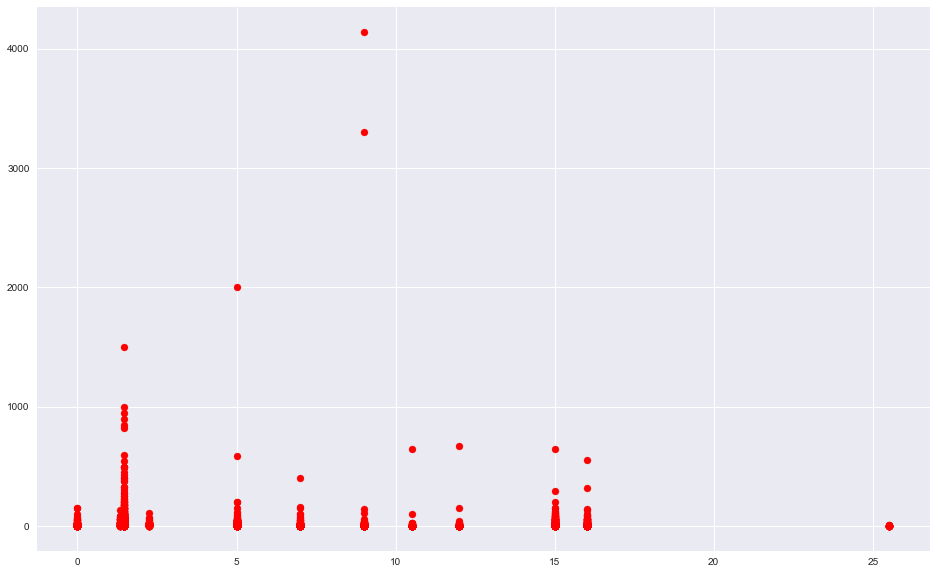

In [448]:
plt.scatter(rose_50cm.cost, rose_50cm.quantity, c='R')

In [302]:
oriental_lillies = line_products[line_products.product_name == 'ORIENTAL LILLY']

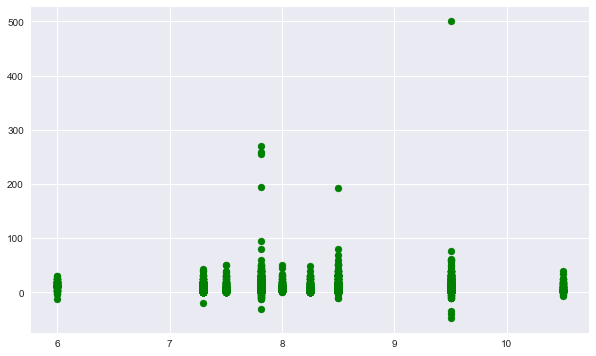

In [303]:
plt.scatter(oriental_lillies.cost, oriental_lillies.quantity, c='g')

In [304]:
tulips = line_products[(line_products.product_name == 'TULIPS') & (line_products.quantity > 0)]

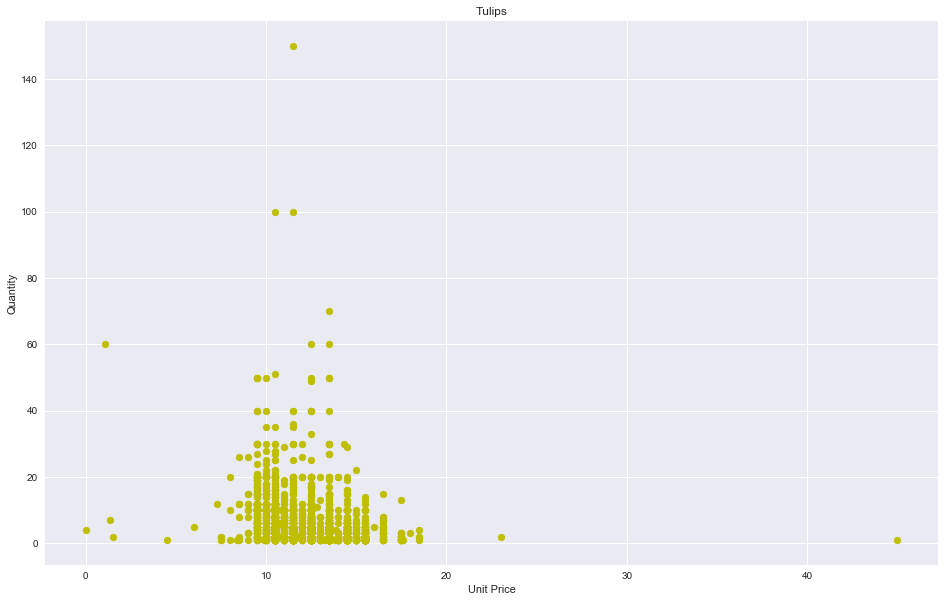

In [445]:
plt.scatter(tulips.unit_price, tulips.quantity, c = 'y')
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.title("Tulips")


## RFM model on products

In [306]:
prod_summary = summary_data_from_transaction_data(df_flowers, 'product_id', 'sale_date', 'line_total_price', freq='W')
#prod_summary.sort_values(['frequency', 'monetary_value'], ascending=False)

In [307]:
#Set index for the merge below to get product name
prod = products2[['product_id','product_name']]
prod.set_index(['product_id'], inplace=True)
prod.head()

,product_name
product_id,
b8ca3a65-01b5-11e4-fbb5-7e84942322fe,SIM CARNATION
b8ca3a65-01b5-11e4-fbb5-7e846ad3f4fa,ACCESSORIES
b8ca3a65-01b5-11e4-fbb5-7e8496ea55e0,ACUBA
b8ca3a65-01b5-11e4-fbb5-7e848a6b1d1a,AGAPANTHUS~mini
b8ca3a65-01b5-11e4-fbb5-7e848fddfc88,ALLIUM


In [308]:
prod_summary = prod_summary.merge(prod[['product_name']], how='left', left_index=True, right_index=True)
prod_summary.sort_values(['frequency', 'monetary_value'], ascending=False)

,frequency,recency,T,monetary_value,product_name
product_id,,,,,
b8ca3a65-01b5-11e4-fbb5-7e848e334e23,138.0,140.0,140.0,1594.767174,CHRYS GHX
b8ca3a65-01b5-11e4-fbb5-7e84a0f5f31a,137.0,137.0,137.0,2357.273723,FRESH MIX
b8ca3a65-01b5-11e4-fbb5-7e8492341e62,137.0,137.0,137.0,1586.309854,ASIATIC LILY
b8ca3a65-01b5-11e4-fbb5-7e84a319a84d,137.0,137.0,137.0,609.424891,GLADIOLI
b8ca3a65-01b5-11e4-fbb5-7e848e937ace,137.0,137.0,137.0,499.548905,SPRAY CARNATION
b8ca3a65-01b5-11e4-fbb5-7e848c91156d,137.0,137.0,137.0,375.476934,VIBERNUM
b8ca3a65-01b5-11e4-fbb5-7e84877ab5e0,137.0,137.0,137.0,159.409489,LEATHER FERN
b8ca3a65-01b5-11e4-fbb5-7e8487a92f4e,137.0,137.0,137.0,102.818248,MONSTERIA
b8ca3a65-01b5-11e4-fbb5-7e848c5f9328,137.0,137.0,137.0,91.170292,PALMS~yellow


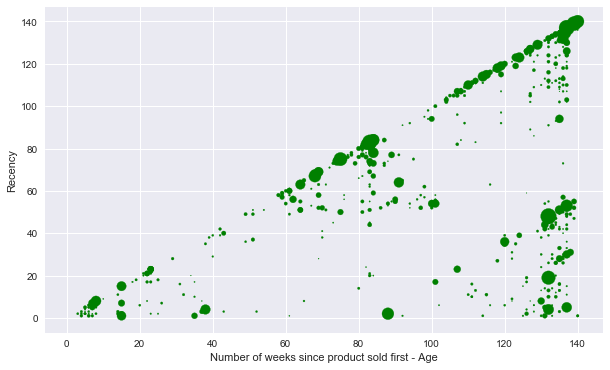

In [309]:
plt.scatter(prod_summary['T'], prod_summary.recency, 
                          s=0.1 * prod_summary.monetary_value , c='g')
plt.xlabel("Number of weeks since product sold first - Age")
plt.ylabel("Recency")


In [310]:
best_products = prod_summary[prod_summary.recency == prod_summary['T']]
best_products

,frequency,recency,T,monetary_value,product_name
product_id,,,,,
060f02b1-c8b5-11e6-e913-ff84a32a022b,23.0,23.0,23.0,148.956522,Olive Branches
060f02b1-c8b5-11e6-e913-ff86b0448e0f,22.0,23.0,23.0,382.090909,Roses~David Austin
060f02b1-c8b5-11e6-e913-ff926e7bbdbd,23.0,23.0,23.0,337.630435,cluster rose
060f02b1-c8b5-11e6-fcd2-212ed4c95ed4,44.0,64.0,64.0,111.722727,IRIS
060f02b1-c8b5-11e7-e913-02e0f7b8cf02,23.0,23.0,23.0,394.189130,SUNFLOWER
060f02b1-c8b5-11e7-e913-02e2543632e7,22.0,23.0,23.0,204.261364,HYDRANGEA
060f02b1-c8b5-11e7-e913-02e3a5190b73,8.0,23.0,23.0,84.687500,Amaranthus
060f02b1-c8b5-11e7-e913-02e541f29225,16.0,23.0,23.0,119.200000,MONSTERIA
060f02b1-c8b5-11e7-e913-02e6f32d202d,14.0,23.0,23.0,106.264286,Oriental~ Rose Lily


In [311]:
number_of_once_off_products = prod_summary[prod_summary.frequency == 0]
number_of_once_off_products

,frequency,recency,T,monetary_value,product_name
product_id,,,,,
060f02b1-c8b5-11e7-e913-02e8f621aaa1,0.0,0.0,20.0,0.0,TWEEDIA
060f02b1-c8b5-11e7-e913-02ef2e5eae6d,0.0,0.0,2.0,0.0,ALSTRO~Std
064dce89-c7b5-11e5-ec2a-b73e6a7f7f42,0.0,0.0,48.0,0.0,70cm Rose
064dce89-c7b5-11e5-ec2a-b74ba33ceac8,0.0,0.0,81.0,0.0,SPRAY CARNATION
064dce89-c7b5-11e5-ec2a-b74c3c7bd144,0.0,0.0,69.0,0.0,ASTER
064dce89-c7b5-11e5-ec2a-b74d4514146d,0.0,0.0,39.0,0.0,FRESH MIX
064dce89-c7b5-11e5-ec2a-b74dc3468101,0.0,0.0,80.0,0.0,NATIVE POSY
06e08a30-eeb5-11e7-ec24-56e5ed3bd7f5,0.0,0.0,1.0,0.0,Herb Posy
06e08a30-eeb5-11e7-ec24-56f643b2a2ca,0.0,0.0,1.0,0.0,Bay Leaf


In [312]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(prod_summary['frequency'], prod_summary['recency'], prod_summary['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 775 subjects, a: 0.25, alpha: 2.27, b: 8.78, r: 0.92>


In [313]:
#from lifetimes.plotting import plot_frequency_recency_matrix

#plot_frequency_recency_matrix(bgf, cmap='gist_ncar')

In [314]:
#from lifetimes.plotting import plot_probability_alive_matrix

#plot_probability_alive_matrix(bgf, cmap='gist_ncar')

## Ranking products

Rank products from “highest expected purchases in the next period” to lowest. Models expose a method that will predict a expected product purchases in the next given period using their history.

In [379]:
t = 30
prod_summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
                                 t, prod_summary['frequency'], prod_summary['recency'], prod_summary['T'])
prod_summary.sort_values(['frequency', 'predicted_purchases'], ascending=False).head(20)

,frequency,recency,T,monetary_value,product_name,predicted_purchases
product_id,,,,,,
b8ca3a65-01b5-11e4-fbb5-7e848e334e23,138.0,140.0,140.0,1594.767174,CHRYS GHX,28.734822
b8ca3a65-01b5-11e4-fbb5-7e84877ab5e0,137.0,137.0,137.0,159.409489,LEATHER FERN,29.133434
b8ca3a65-01b5-11e4-fbb5-7e8487a92f4e,137.0,137.0,137.0,102.818248,MONSTERIA,29.133434
b8ca3a65-01b5-11e4-fbb5-7e848c5f9328,137.0,137.0,137.0,91.170292,PALMS~yellow,29.133434
b8ca3a65-01b5-11e4-fbb5-7e848c91156d,137.0,137.0,137.0,375.476934,VIBERNUM,29.133434
b8ca3a65-01b5-11e4-fbb5-7e848e937ace,137.0,137.0,137.0,499.548905,SPRAY CARNATION,29.133434
b8ca3a65-01b5-11e4-fbb5-7e8492341e62,137.0,137.0,137.0,1586.309854,ASIATIC LILY,29.133434
b8ca3a65-01b5-11e4-fbb5-7e84a0f5f31a,137.0,137.0,137.0,2357.273723,FRESH MIX,29.133434
b8ca3a65-01b5-11e4-fbb5-7e84a319a84d,137.0,137.0,137.0,609.424891,GLADIOLI,29.133434


# Cluster analysis

In [316]:
#Step 1 : Creating a dataframe with customers as rows and products as columns and no. of purchase as values


In [317]:
df_cust = df_flowers.groupby(['agg_product_name', 'customer_id']).size().reset_index()
df_cust.rename(columns={0:'num_purchases'},inplace=True)

In [318]:
# Weight purchases based on how long we have had the customer
# Otherwise two identical customers with different ages would look different
df_cust2 = df_cust.merge(summary, left_on='customer_id', right_index=True)
df_cust2['weighted_purchases'] = df_cust2.num_purchases / (1+df_cust2['T'])
df_cust2

,agg_product_name,customer_id,num_purchases,frequency,recency,T,monetary_value,customer_name,predicted_purchases,weighted_purchases
0,40CM ROSE,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,1,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.014493
94,50CM ROSE,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,29,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.420290
1151,ALSTRO,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,10,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.144928
1447,AMARANTHUS,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,6,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.086957
1550,ANDROMEDA,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,2,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.028986
1797,ANTHURIUM LEAVES,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,1,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.014493
2352,ASPARAGUS FERN,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,2,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.028986
2416,ASTER,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,10,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.144928
2611,ASTER LUTIA,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,1,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.014493
2685,ASTILBE,0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,1,31.0,67.0,68.0,272.693548,Gypsy & Bloom **,21.986550,0.014493


In [319]:
lp = df_flowers.groupby('agg_product_name')['quantity'].sum().sort_values(ascending=False)
rarely_sold = list(lp.index[lp < 4])
#len(rarely_sold)

In [320]:
#Pivot table

cs1 = pd.pivot_table(df_cust2, values='weighted_purchases', index=['customer_id'],
                     columns=['agg_product_name'], aggfunc=np.sum)
cs1.fillna(value=0, inplace=True)
cs1.drop(rarely_sold, axis=1, inplace=True)
cs1

agg_product_name,40CM ROSE,50CM ROSE,60CM ROSE,70CM ROSE,ACACIA,ACCESSORIES,ACHILLEA,ACUBA,AFRICAN VIOLET POT,AGAPANTHUS,...,WALLFLOWER,WARATAH,WATTLE,WAX FLOWER,WHEAT,WOOLLY BUSH,X MAS LILY,XMAS TREE'S,YELLOW BELLS,ZINNIA
customer_id,,,,,,,,,,,,,,,,,,,,,
022894d1-fdb5-11e7-f9b3-31e1b9aa2a49,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
022894d1-fdb5-11e7-f9b3-3390d08cc968,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
022894d1-fdb5-11e7-f9b3-33a262c45d63,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
022894d1-fdb5-11e7-f9b3-351d6790b236,0.000000,0.066667,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
0274a24e-fdb5-11e6-f3f1-0cacbb4395f3,0.014493,0.420290,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.014493,0.000000,0.101449,0.000000,0.000000,0.0,0.000000,0.0,0.0
0274a24e-fdb5-11e6-f3f1-0cc649da02e9,0.000000,0.000000,0.000000,0.000000,0.0,0.101449,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
0274a24e-fdb5-11e6-f3f1-0cc79ddebfa7,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
0274a24e-fdb5-11e6-f3f1-0d9315afab0a,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
0274a24e-fdb5-11e6-f3f1-0e735df5ced4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


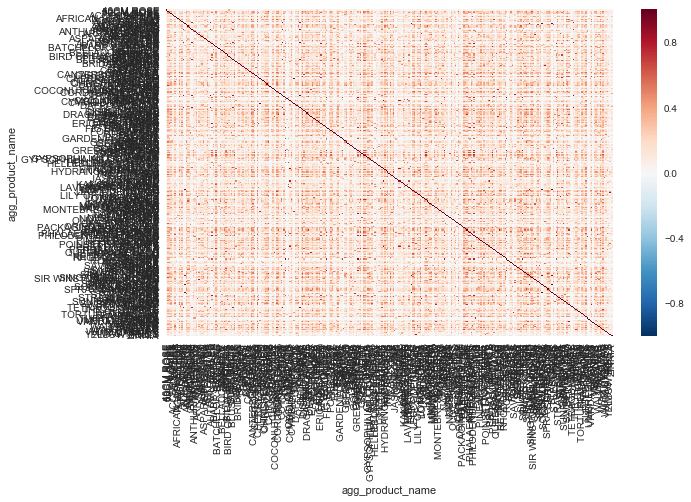

In [321]:
sns.heatmap(cs1.corr())

In [322]:
cs1.corr()

agg_product_name,40CM ROSE,50CM ROSE,60CM ROSE,70CM ROSE,ACACIA,ACCESSORIES,ACHILLEA,ACUBA,AFRICAN VIOLET POT,AGAPANTHUS,...,WALLFLOWER,WARATAH,WATTLE,WAX FLOWER,WHEAT,WOOLLY BUSH,X MAS LILY,XMAS TREE'S,YELLOW BELLS,ZINNIA
agg_product_name,,,,,,,,,,,,,,,,,,,,,
40CM ROSE,1.000000,0.106380,0.080219,0.062787,0.004576,0.014147,0.066646,-0.007847,0.003296,0.036044,...,0.065800,0.042408,0.015914,0.054700,-0.001101,0.023733,0.038489,0.006293,0.005880,0.025476
50CM ROSE,0.106380,1.000000,0.478196,0.396227,0.130019,0.115125,0.230934,0.045995,0.055246,0.205456,...,0.075541,0.364994,0.223211,0.517621,0.107529,0.222954,0.171471,0.079366,0.165747,0.090166
60CM ROSE,0.080219,0.478196,1.000000,0.342966,0.079613,0.195971,0.199437,0.019400,0.028058,0.211972,...,0.126219,0.256560,0.244850,0.379238,0.068221,0.160396,0.047462,0.050655,0.022675,0.065061
70CM ROSE,0.062787,0.396227,0.342966,1.000000,0.033234,0.080276,0.301091,0.029335,0.026419,0.373988,...,0.110224,0.453356,0.122101,0.298409,0.028234,0.072034,0.176369,0.173305,0.051338,0.089976
ACACIA,0.004576,0.130019,0.079613,0.033234,1.000000,0.038568,0.018919,-0.005449,-0.007601,0.008227,...,0.036184,0.166124,0.091193,0.064185,0.062681,0.010882,-0.006114,0.023848,0.004691,-0.008783
ACCESSORIES,0.014147,0.115125,0.195971,0.080276,0.038568,1.000000,0.068158,0.003911,0.049189,0.119730,...,0.012603,0.074454,0.041017,0.067782,0.043119,0.028825,0.027650,0.062954,0.001186,0.050253
ACHILLEA,0.066646,0.230934,0.199437,0.301091,0.018919,0.068158,1.000000,0.053813,0.019018,0.330745,...,0.554278,0.383885,0.278136,0.391906,0.068490,0.107040,0.190746,0.068414,0.037767,0.287287
ACUBA,-0.007847,0.045995,0.019400,0.029335,-0.005449,0.003911,0.053813,1.000000,-0.004840,0.056002,...,-0.005312,0.232305,0.035106,0.037309,0.117738,0.128004,-0.003893,-0.006969,0.017080,-0.005593
AFRICAN VIOLET POT,0.003296,0.055246,0.028058,0.026419,-0.007601,0.049189,0.019018,-0.004840,1.000000,0.194578,...,-0.007409,0.009015,0.040471,0.025291,0.007436,0.099847,-0.005431,0.013889,0.000794,0.065555


In [323]:
corr_matrix = cs1.corr()
corr_matrix.reset_index()

agg_product_name,agg_product_name,40CM ROSE,50CM ROSE,60CM ROSE,70CM ROSE,ACACIA,ACCESSORIES,ACHILLEA,ACUBA,AFRICAN VIOLET POT,...,WALLFLOWER,WARATAH,WATTLE,WAX FLOWER,WHEAT,WOOLLY BUSH,X MAS LILY,XMAS TREE'S,YELLOW BELLS,ZINNIA
0,40CM ROSE,1.000000,0.106380,0.080219,0.062787,0.004576,0.014147,0.066646,-0.007847,0.003296,...,0.065800,0.042408,0.015914,0.054700,-0.001101,0.023733,0.038489,0.006293,0.005880,0.025476
1,50CM ROSE,0.106380,1.000000,0.478196,0.396227,0.130019,0.115125,0.230934,0.045995,0.055246,...,0.075541,0.364994,0.223211,0.517621,0.107529,0.222954,0.171471,0.079366,0.165747,0.090166
2,60CM ROSE,0.080219,0.478196,1.000000,0.342966,0.079613,0.195971,0.199437,0.019400,0.028058,...,0.126219,0.256560,0.244850,0.379238,0.068221,0.160396,0.047462,0.050655,0.022675,0.065061
3,70CM ROSE,0.062787,0.396227,0.342966,1.000000,0.033234,0.080276,0.301091,0.029335,0.026419,...,0.110224,0.453356,0.122101,0.298409,0.028234,0.072034,0.176369,0.173305,0.051338,0.089976
4,ACACIA,0.004576,0.130019,0.079613,0.033234,1.000000,0.038568,0.018919,-0.005449,-0.007601,...,0.036184,0.166124,0.091193,0.064185,0.062681,0.010882,-0.006114,0.023848,0.004691,-0.008783
5,ACCESSORIES,0.014147,0.115125,0.195971,0.080276,0.038568,1.000000,0.068158,0.003911,0.049189,...,0.012603,0.074454,0.041017,0.067782,0.043119,0.028825,0.027650,0.062954,0.001186,0.050253
6,ACHILLEA,0.066646,0.230934,0.199437,0.301091,0.018919,0.068158,1.000000,0.053813,0.019018,...,0.554278,0.383885,0.278136,0.391906,0.068490,0.107040,0.190746,0.068414,0.037767,0.287287
7,ACUBA,-0.007847,0.045995,0.019400,0.029335,-0.005449,0.003911,0.053813,1.000000,-0.004840,...,-0.005312,0.232305,0.035106,0.037309,0.117738,0.128004,-0.003893,-0.006969,0.017080,-0.005593
8,AFRICAN VIOLET POT,0.003296,0.055246,0.028058,0.026419,-0.007601,0.049189,0.019018,-0.004840,1.000000,...,-0.007409,0.009015,0.040471,0.025291,0.007436,0.099847,-0.005431,0.013889,0.000794,0.065555
9,AGAPANTHUS,0.036044,0.205456,0.211972,0.373988,0.008227,0.119730,0.330745,0.056002,0.194578,...,0.055327,0.502829,0.173444,0.242625,0.024312,0.135226,0.434318,0.053760,0.031290,0.061196


In [324]:
melted_corr = pd.melt(corr_matrix.reset_index(),  id_vars='index', value_vars=corr_matrix.columns)
melted_corr.columns = ['flower1', 'flower2', 'correlation_strength']
melted_corr = melted_corr[melted_corr.flower1 < melted_corr.flower2]
melted_corr.sort_values('correlation_strength', ascending=False)

,flower1,flower2,correlation_strength
0,NaN,40CM ROSE,1.000000
34444,NaN,ERICA (HEATHER),1.000000
32232,NaN,DUSTY MILLER,1.000000
32548,NaN,EASTER DAISY,1.000000
32864,NaN,ECHINACEA,1.000000
33180,NaN,ECHINOPS,1.000000
33496,NaN,EMILE,1.000000
33812,NaN,EMU GRASS,1.000000
34128,NaN,ENGLISH BOX,1.000000
34760,NaN,ERIOSTAMON,1.000000


In [325]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import sklearn.cluster


In [326]:
km = sklearn.cluster.KMeans(n_clusters=6)
clusters = km.fit_predict(cs1)
clusters

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 5, 1, 1, 1, 3, 4, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 4, 3, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1,
       1, 1,

In [327]:
pd.Series(clusters).value_counts()

1    713
3     93
5     21
4     15
2     11
0      4
dtype: int64

In [328]:
km.cluster_centers_

array([[  2.56630854e-02,   1.74290680e+00,   5.28758184e-02, ...,
          2.08333333e-03,   2.59498629e-02,   0.00000000e+00],
       [  1.47207251e-03,   3.17679594e-02,   2.65338300e-03, ...,
          2.55004463e-05,   3.39568442e-04,   7.89133335e-05],
       [  6.79493141e-03,   8.85983263e-01,   1.23460491e-01, ...,
          1.31752306e-03,   5.60499128e-03,   3.30349531e-03],
       [  1.13051492e-02,   3.13205940e-01,   2.14591121e-02, ...,
          1.13307633e-03,   1.41335303e-03,   8.34527680e-04],
       [  8.24440578e-03,   1.06192016e+00,   7.47646896e-02, ...,
          1.08420217e-19,   3.55555556e-02,  -2.71050543e-20],
       [  5.93585181e-03,   4.02596776e-01,   7.03831148e-03, ...,
          6.41717381e-03,   6.90131125e-04,   3.45065562e-04]])

In [329]:
cluster_df = pd.DataFrame(
    { cs1.columns[i]: km.cluster_centers_[:,i] for i in range(len(cs1.columns))
})
cluster_df.T 

,0,1,2,3,4,5
40CM ROSE,0.025663,1.472073e-03,6.794931e-03,1.130515e-02,8.244406e-03,5.935852e-03
50CM ROSE,1.742907,3.176796e-02,8.859833e-01,3.132059e-01,1.061920e+00,4.025968e-01
60CM ROSE,0.052876,2.653383e-03,1.234605e-01,2.145911e-02,7.476469e-02,7.038311e-03
70CM ROSE,0.015842,2.850398e-04,1.672946e-02,4.687281e-03,1.817021e-02,1.086957e-03
ACACIA,0.000000,4.504737e-05,-2.710505e-20,4.099871e-04,2.436668e-03,-2.710505e-20
ACCESSORIES,0.001812,2.244215e-03,1.011959e-02,8.110309e-03,1.828474e-02,3.159869e-03
ACHILLEA,0.012192,2.750132e-04,1.840844e-02,6.493102e-03,1.025211e-02,6.901311e-04
ACUBA,0.000000,1.275022e-05,0.000000e+00,1.558361e-04,0.000000e+00,0.000000e+00
AFRICAN VIOLET POT,0.000000,1.266550e-04,-2.710505e-20,2.823075e-04,7.936508e-04,3.450656e-04
AGAPANTHUS,0.006757,3.892423e-04,4.276690e-02,2.448682e-03,8.241246e-03,6.901311e-04


In [330]:
cluster_df.T.idxmax()

0    ORIENTAL LILLY
1         50CM ROSE
2         50CM ROSE
3         50CM ROSE
4         50CM ROSE
5         FRESH MIX
dtype: object

In [331]:
for cluster_number in cluster_df.T.columns:
    print "Cluster", cluster_number, "typically buys this per week:"
    print cluster_df.loc[cluster_number].sort_values().tail(3)
    print

Cluster 0 typically buys this per week:
50CM ROSE         1.742907
FRESH MIX         2.384764
ORIENTAL LILLY    2.403469
Name: 0, dtype: float64

Cluster 1 typically buys this per week:
SPRAY ROSE        0.021976
ORIENTAL LILLY    0.024018
50CM ROSE         0.031768
Name: 1, dtype: float64

Cluster 2 typically buys this per week:
SPRAY ROSE          0.754583
SINGAPORE ORCHID    0.829174
50CM ROSE           0.885983
Name: 2, dtype: float64

Cluster 3 typically buys this per week:
SPRAY ROSE        0.262344
ORIENTAL LILLY    0.285687
50CM ROSE         0.313206
Name: 3, dtype: float64

Cluster 4 typically buys this per week:
ORIENTAL LILLY    1.010702
CHRYS GHX         1.027318
50CM ROSE         1.061920
Name: 4, dtype: float64

Cluster 5 typically buys this per week:
ORIENTAL LILLY    0.756094
NATIVE POSY       0.803684
FRESH MIX         1.686848
Name: 5, dtype: float64



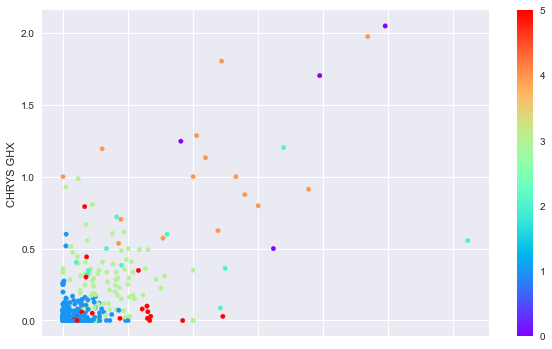

In [332]:
cs1[['50CM ROSE', "CHRYS GHX"]].plot.scatter('50CM ROSE', "CHRYS GHX", c=clusters,
                                                 cmap='rainbow')

In [333]:
km.cluster_centers_

array([[  2.56630854e-02,   1.74290680e+00,   5.28758184e-02, ...,
          2.08333333e-03,   2.59498629e-02,   0.00000000e+00],
       [  1.47207251e-03,   3.17679594e-02,   2.65338300e-03, ...,
          2.55004463e-05,   3.39568442e-04,   7.89133335e-05],
       [  6.79493141e-03,   8.85983263e-01,   1.23460491e-01, ...,
          1.31752306e-03,   5.60499128e-03,   3.30349531e-03],
       [  1.13051492e-02,   3.13205940e-01,   2.14591121e-02, ...,
          1.13307633e-03,   1.41335303e-03,   8.34527680e-04],
       [  8.24440578e-03,   1.06192016e+00,   7.47646896e-02, ...,
          1.08420217e-19,   3.55555556e-02,  -2.71050543e-20],
       [  5.93585181e-03,   4.02596776e-01,   7.03831148e-03, ...,
          6.41717381e-03,   6.90131125e-04,   3.45065562e-04]])

In [334]:
km.cluster_centers_[:,1]

array([ 1.7429068 ,  0.03176796,  0.88598326,  0.31320594,  1.06192016,
        0.40259678])

In [335]:
score = silhouette_score(cs1, clusters, metric='euclidean')
score

0.62767319684287459

In [336]:
model = KMeans(n_clusters=6, random_state=0).fit(cs1)

In [337]:
predicted = model.labels_
centroids = model.cluster_centers_

print "Predicted clusters to points: ", predicted
print "Location of centroids: "
print centroids

Predicted clusters to points:  [1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 4 1 1 1 1 2 1 1 2 1
 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 5 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2
 1 1 1 1 2 1 1 1 1 0 1 1 1 2 4 2 1 1 1 1 1 4 1 1 1 1 2 1 4 2 1 1 1 5 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 2 1 1 1 4 1 1 1 1 2 1 1 2 1
 1 4 1 1 1 1 1 1 2 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 3 1 1 1 1 1 1 4 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 0 